# This notebook allows to reproduce the figures of the paper: 

## *A data-driven model to estimate time-variable catchment transit time distributions*

In [1]:
import numpy as np
import pandas as pd

import os
import sys

sys.path.append('/home/duchemin/Documents/githubWATRES/zenodo_package/')
path_notebook = os.getcwd()
path_data = os.path.normpath(os.path.join(path_notebook, "..", "data"))

from WATRES import *
from WATRES.visualization import *

In [2]:
def nse(observed, simulated):
    """
    Calculate the Nash-Sutcliffe Efficiency (NSE).
    
    Parameters:
    observed (array-like): Array of observed values.
    simulated (array-like): Array of simulated values.
    
    Returns:
    float: NSE value.
    """
    observed = np.array(observed)
    simulated = np.array(simulated)
    
    # Calculate the mean of the observed data
    mean_observed = np.mean(observed)
    
    # Compute the numerator and denominator of the NSE formula
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - mean_observed) ** 2)
    
    # Compute NSE
    nse_value = 1 - (numerator / denominator)
    
    return nse_value

def rmse(y_true, y_pred):
    """
    Compute Root Mean Square Error between two arrays.

    Parameters:
    y_true (array-like): True/observed values
    y_pred (array-like): Predicted/estimated values

    Returns:
    float: RMSE value
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def correlation_coefficient(x, y):
    """
    Compute the Pearson correlation coefficient between two arrays.

    Parameters:
    x (array-like): First dataset
    y (array-like): Second dataset

    Returns:
    float: Correlation coefficient
    """
    x = np.array(x)
    y = np.array(y)
    
    if x.size != y.size:
        raise ValueError("Input arrays must have the same length.")
    
    return np.corrcoef(x, y)[0, 1]

# Collect results

In [3]:
sites = ['Basel_small_storage','Basel_large_storage','Pully_small_storage','Pully_large_storage','Lugano_small_storage','Lugano_large_storage']
algos = ['WATRES', 'AgeDomain', 'Weibull']

algo2name = {'WATRES':'WATRES', 'AgeDomain':'J-Weighted', 'Weibull':'Weibull', 'EHS':'EHS'}
sitenames = ['Site A-small', 'Site A-large', 'Site B-small', 'Site B-large', 'Site C-small', 'Site C-large']
site2name = {site: sitenames[i] for i, site in enumerate(sites)}

settings = []
for site in sites:
    path_data_site = os.path.join(path_data, site)
    for algo in algos:
        settings.append({'site':site, 
                         'pathsite':path_data_site,
                         'algo':algo,
                         'path_model':os.path.join(path_data_site, 'save', f'save_input_std_0.1-output_std_0.1_{algo}.pth.tar'),
                         'path_results':os.path.join(path_data_site, 'save', f'results_input_std_0.1-output_std_0.1_{algo}.pkl')
                        })
results = gather_results_all_sites(settings)

# $F_{90}$ – Violin plots

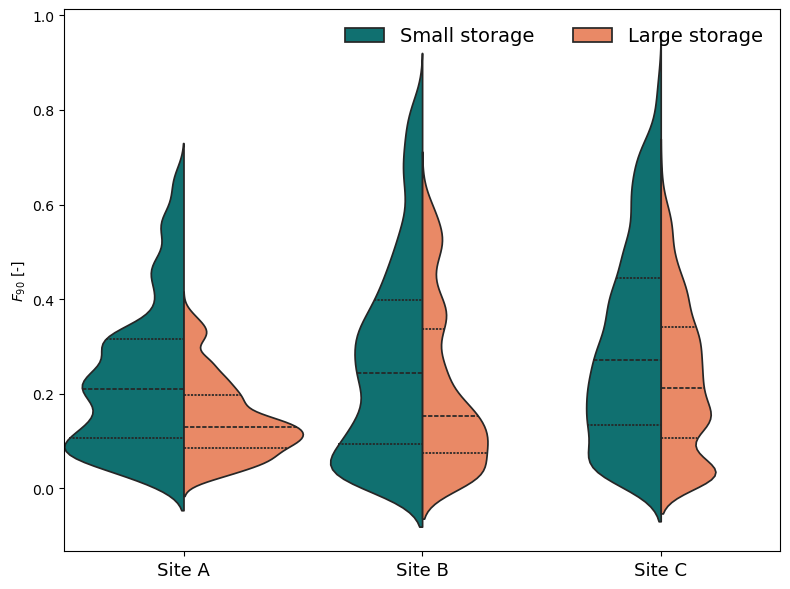

In [4]:
# Prepare the plotting data
dataset = []
lsywf = []
real_or_esti = []
tickslabel = []
algo = 'WATRES'
colors = ['Teal', 'Coral']
labels = ['Site A', 'Site B', 'Site C']

for j, site_ in enumerate(['Basel','Pully','Lugano']):
    esti_ywf = results[site_+'_small_storage'][algo]['ywf_true'][:, 2]
    dataset += [site_] * 2 * len(esti_ywf)
    lsywf += list(esti_ywf)
    true_ywf = results[site_+'_large_storage'][algo]['ywf_true'][:, 2]
    lsywf += list(true_ywf)
    real_or_esti += ['Small storage'] * len(esti_ywf)
    real_or_esti += ['Large storage'] * len(esti_ywf)
    tickslabel.append(labels[j])
    
dict_plot_data = {'Dataset':dataset, 'Young water fraction':lsywf, 'real_or_esti':real_or_esti}

# Plot data
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.violinplot(data=dict_plot_data, x="Dataset", y="Young water fraction", 
                    hue="real_or_esti", split=True, width=1, inner='quart',
                    palette={"Small storage": colors[0], "Large storage": colors[1]})

ax.set_xticks(list(range(0,len(tickslabel))), tickslabel, rotation=0, fontsize=13)
ax.legend(fontsize=14, ncol=2, frameon=False)
ax.set_xlabel('')
ax.set_ylabel('$F_{90}$ [-]')

fig.tight_layout()
#plt.savefig('distribution_ywf_gt.png', dpi=250, bbox_inches="tight")

In [5]:
ywf_Pully_large = np.load(path_data + '/Pully_large_storage/data/ywf.npy')
ywf_Pully_small = np.load(path_data + '/Pully_small_storage/data/ywf.npy')
ywf_Basel_large = np.load(path_data + '/Basel_large_storage/data/ywf.npy')
ywf_Basel_small = np.load(path_data + '/Basel_small_storage/data/ywf.npy')
ywf_Lugano_large = np.load(path_data + '/Lugano_large_storage/data/ywf.npy')
ywf_Lugano_small = np.load(path_data + '/Lugano_small_storage/data/ywf.npy')

site_A = np.array(['Site A'] * len(ywf_Basel_large))
site_B = np.array(['Site B'] * len(ywf_Pully_large))
site_C = np.array(['Site C'] * len(ywf_Lugano_large))

large_storage = np.array(['Large storage'] * len(ywf_Basel_large))
small_storage = np.array(['Small storage'] * len(ywf_Basel_large))

df_ywf_plot = pd.DataFrame(data={'ywf':np.concatenate((ywf_Basel_small, ywf_Basel_large, ywf_Pully_small, ywf_Pully_large, ywf_Lugano_small, ywf_Lugano_large)),
                                 'site':np.concatenate((site_A, site_A, site_B, site_B, site_C, site_C)),
                                 'storage_type':np.concatenate((small_storage, large_storage, small_storage, large_storage, small_storage, large_storage))})

/tmp/ipykernel_45687/1953321817.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tickslabel, rotation=0, fontsize=font_size)


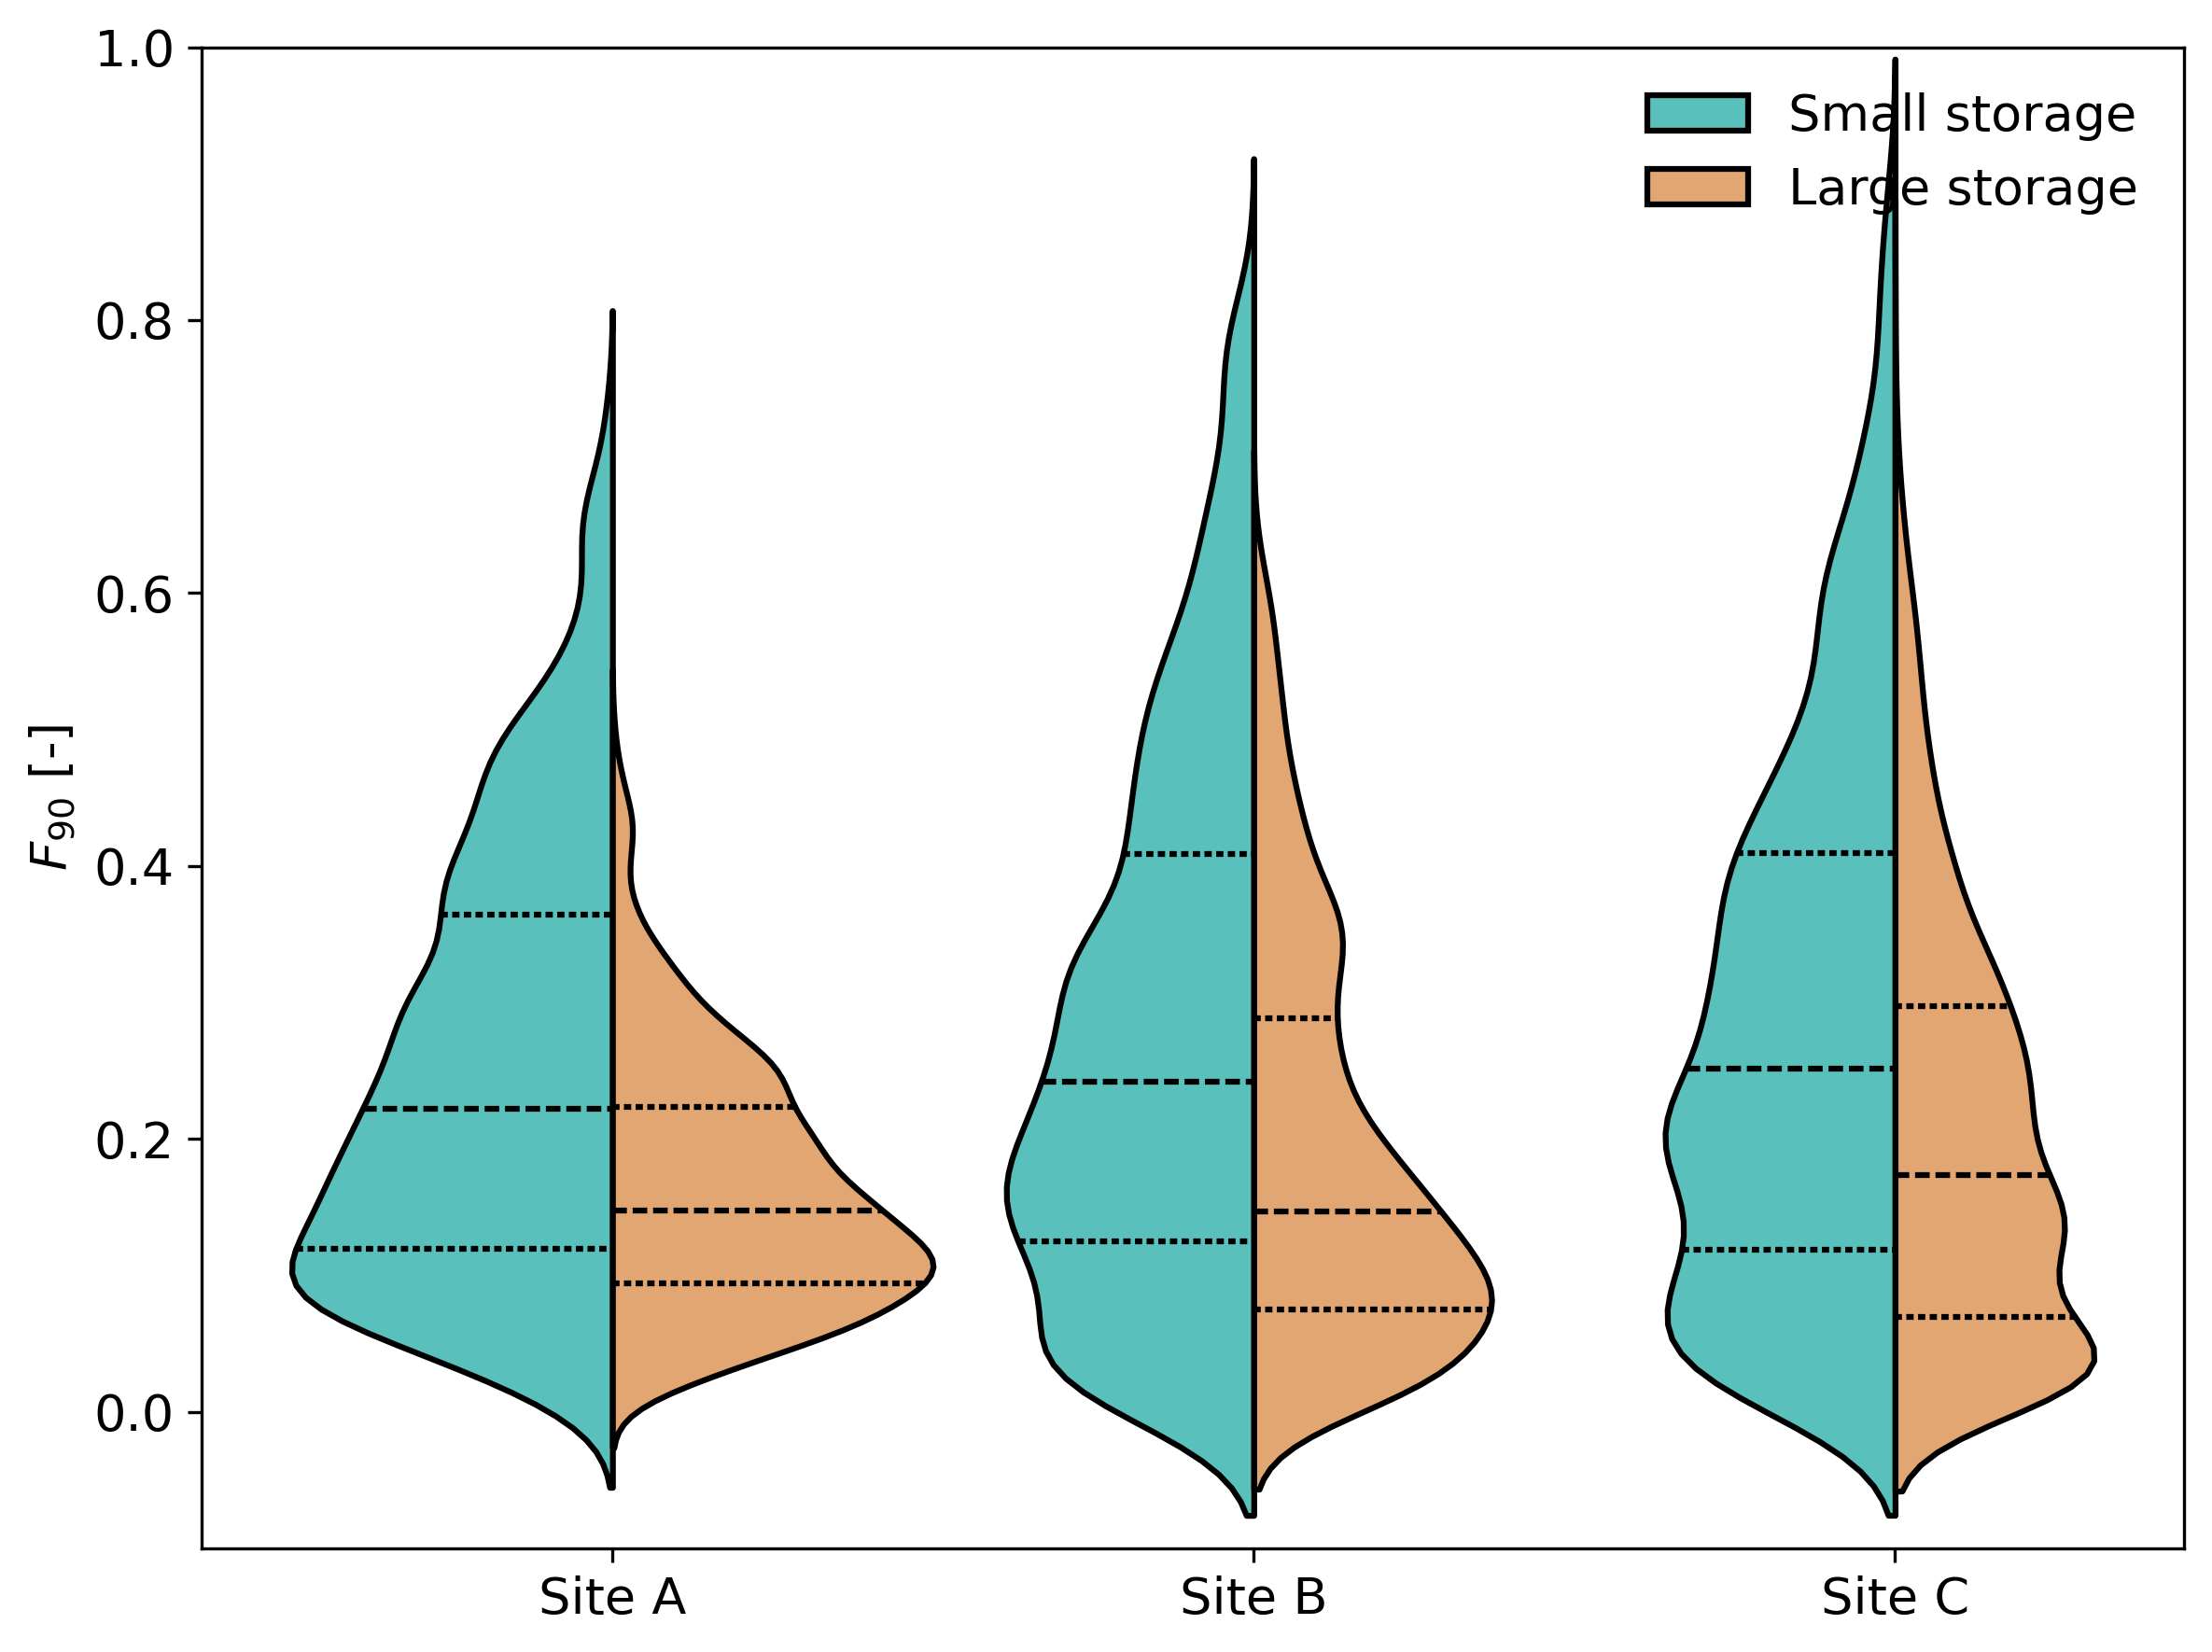

In [6]:
# Plot data
fig, ax = plt.subplots(figsize=(8,6), dpi=300)

colors = ['mediumturquoise', 'sandybrown']

ax = sns.violinplot(data=df_ywf_plot, x="site", y="ywf", 
                    hue="storage_type", split=True, width=1, inner='quart',
                    palette={"Small storage": colors[0], "Large storage": colors[1]},
                    linecolor='k', linewidth=1.5, bw_adjust=1.5)

font_size = 13
ax.set_xticklabels(tickslabel, rotation=0, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
ax.set_ylim(ymin=-0.1, ymax=1)

ax.legend(fontsize=font_size, ncol=1, frameon=False)

ax.set_xlabel('')
ax.set_ylabel('$F_{90}$ [-]', fontsize=font_size)

ax.margins(x=0.05)  # 5% margin on both sides of x-axis

fig.tight_layout()

# WATRES timeseries performance

In [7]:
# Collect data
with open(settings[0]['path_results'], "rb") as input_file:
    results_site_A_small = pickle.load(input_file)
with open(settings[3]['path_results'], "rb") as input_file:
    results_site_A_large = pickle.load(input_file) 

with open(settings[6]['path_results'], "rb") as input_file:
    results_site_B_small = pickle.load(input_file)
with open(settings[9]['path_results'], "rb") as input_file:
    results_site_B_large = pickle.load(input_file)

with open(settings[12]['path_results'], "rb") as input_file:
    results_site_C_small = pickle.load(input_file)
with open(settings[15]['path_results'], "rb") as input_file:
    results_site_C_large = pickle.load(input_file) 

### Tracer timeseries

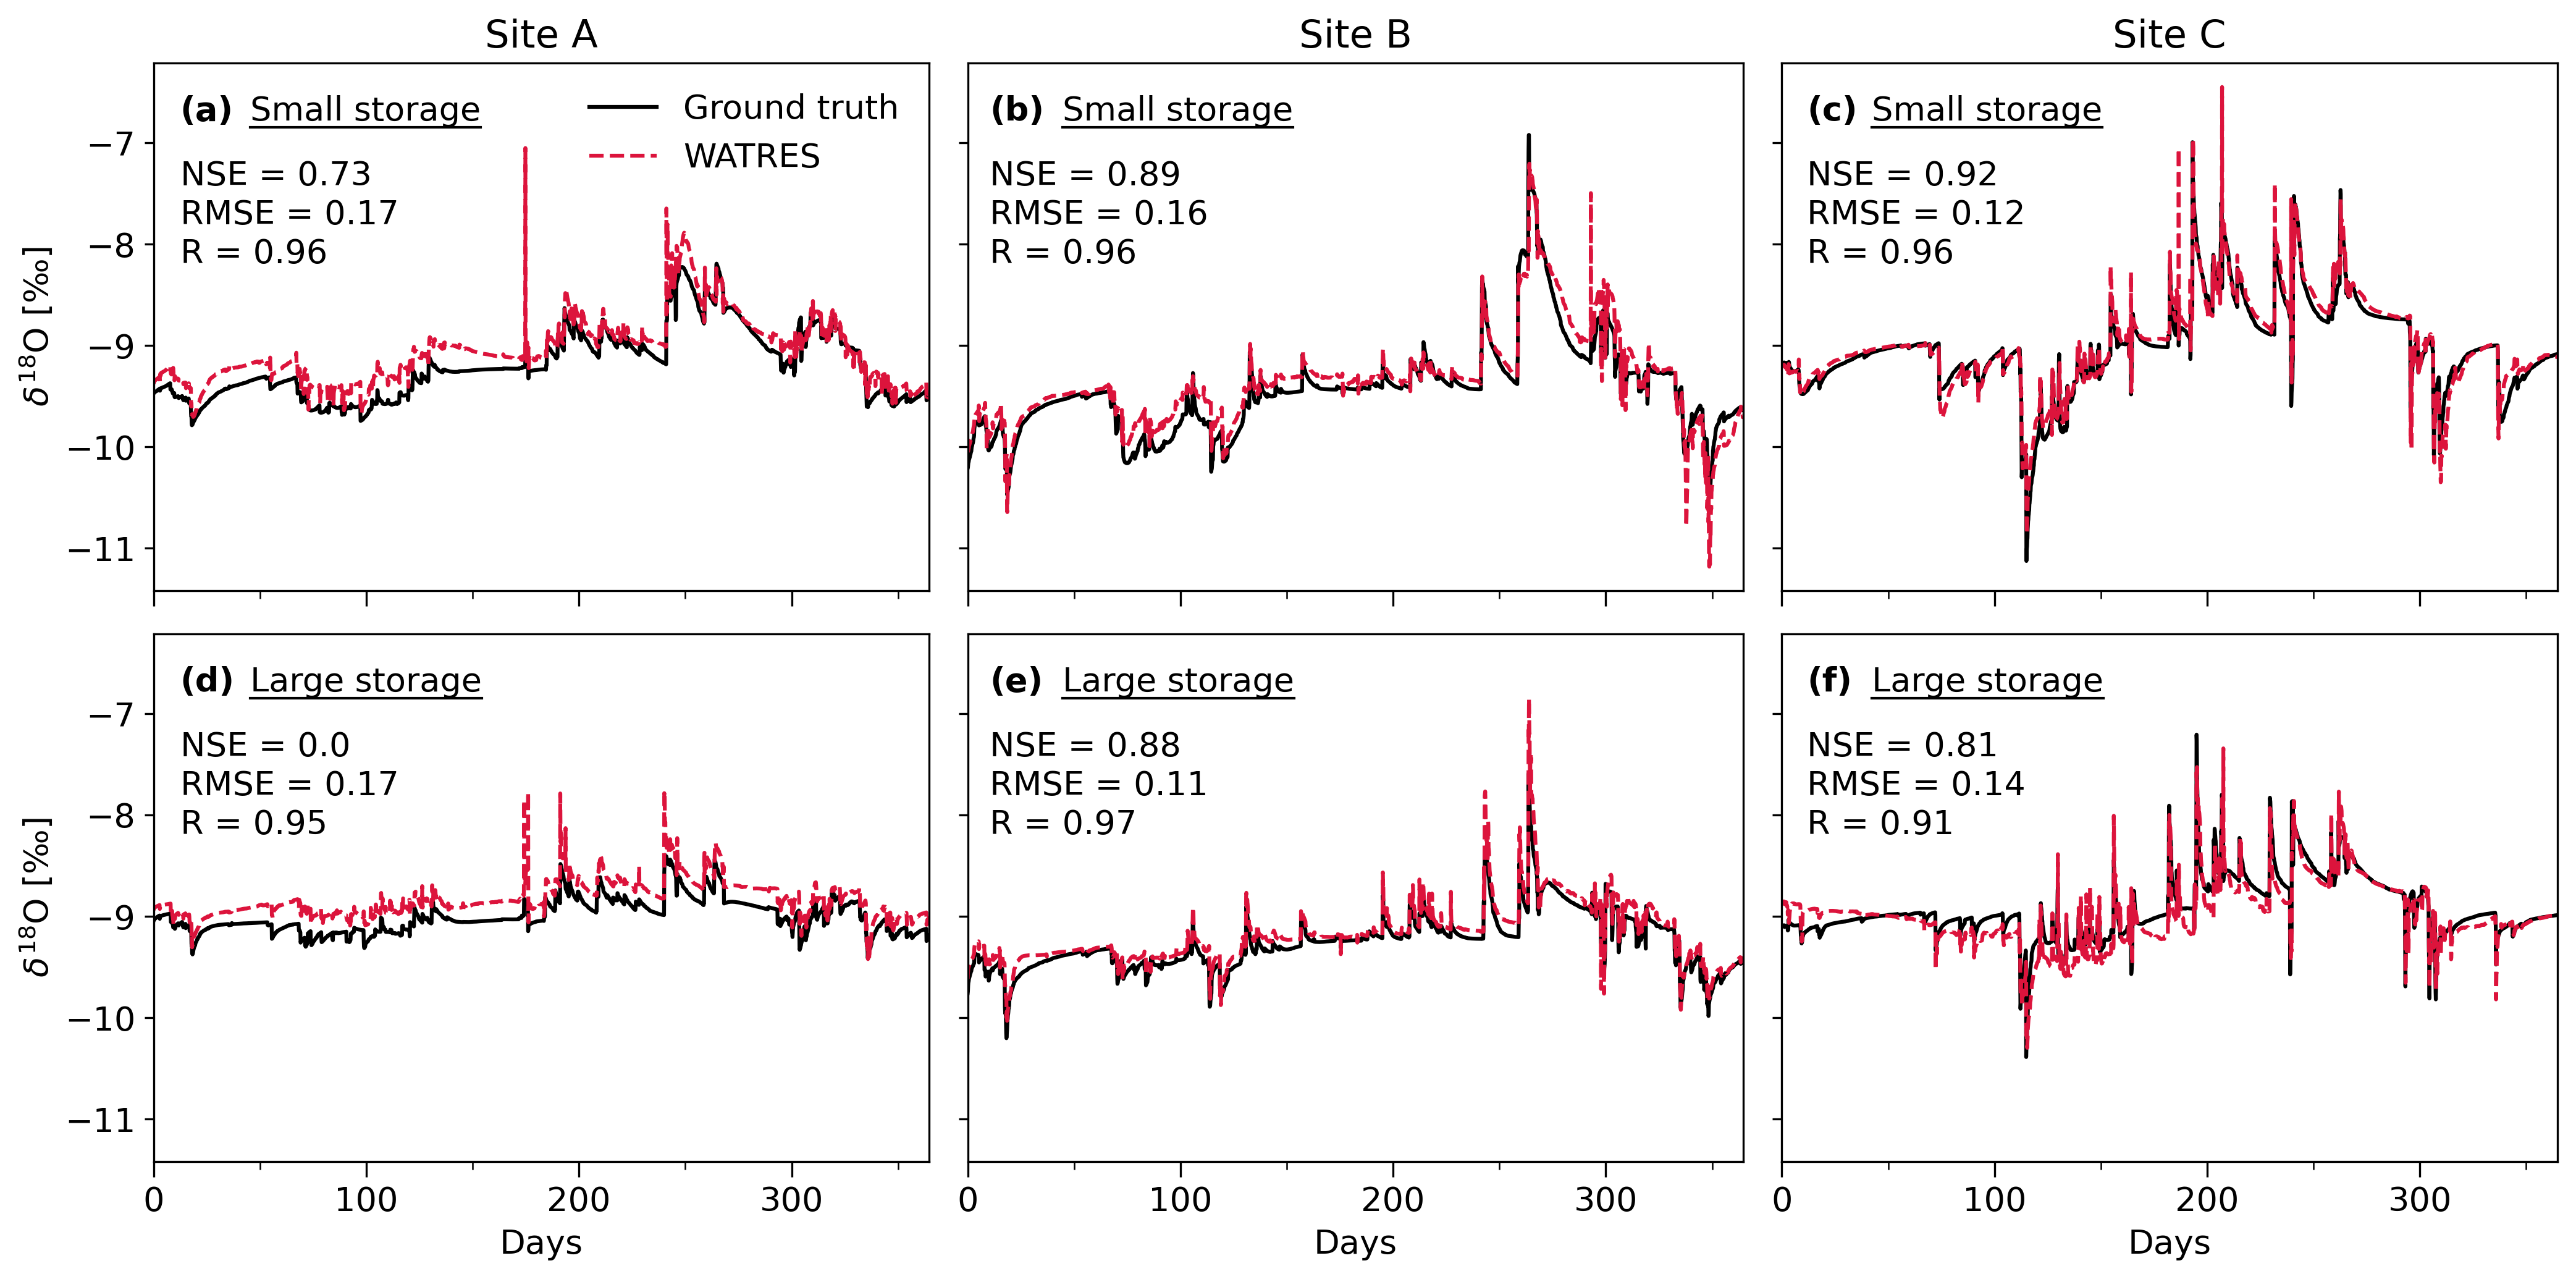

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(14,7), sharey=True, dpi=300)

lst_test = results_site_A_small['timeyear_test']
lst_test = np.arange(len(lst_test)) / 10

# Site A
axs[0][0].plot(lst_test, results_site_A_small['Cout'],  c='black',  label='Ground truth')
axs[0][0].plot(lst_test, results_site_A_small['Chat'],  c='crimson', linestyle='--', label='WATRES')

axs[1][0].plot(lst_test, results_site_A_large['Cout'],  c='black',  label='Ground truth')
axs[1][0].plot(lst_test, results_site_A_large['Chat'],  c='crimson', linestyle='--', label='WATRES')

# Site B
axs[0][1].plot(lst_test, results_site_B_small['Cout'],  c='black',  label='Ground truth')
axs[0][1].plot(lst_test, results_site_B_small['Chat'],  c='crimson', linestyle='--', label='WATRES')

axs[1][1].plot(lst_test, results_site_B_large['Cout'],  c='black',  label='Ground truth')
axs[1][1].plot(lst_test, results_site_B_large['Chat'],  c='crimson', linestyle='--', label='WATRES')

# Site C
axs[0][2].plot(lst_test, results_site_C_small['Cout'],  c='black',  label='Ground truth')
axs[0][2].plot(lst_test, results_site_C_small['Chat'],  c='crimson', linestyle='--', label='WATRES')

axs[1][2].plot(lst_test, results_site_C_large['Cout'],  c='black',  label='Ground truth')
axs[1][2].plot(lst_test, results_site_C_large['Chat'],  c='crimson', linestyle='--', label='WATRES')

# Esthetics
font_size= 13

axs[0][0].set_ylabel(r'$\delta^{18}$O [‰]', fontsize=font_size)
axs[1][0].set_ylabel(r'$\delta^{18}$O [‰]', fontsize=font_size)

axs[1][0].set_xlabel('Days', fontsize=font_size)
axs[1][1].set_xlabel('Days', fontsize=font_size)
axs[1][2].set_xlabel('Days', fontsize=font_size)

axs[0][0].set_title('Site A', fontsize=font_size+2)
axs[0][1].set_title('Site B', fontsize=font_size+2)
axs[0][2].set_title('Site C', fontsize=font_size+2)

axs[0][0].set_xticklabels('')
axs[0][1].set_xticklabels('')
axs[0][2].set_xticklabels('')

axs[0][0].tick_params(axis='y', labelsize=font_size)
axs[1][0].tick_params(axis='y', labelsize=font_size)

axs[1][0].tick_params(axis='x', labelsize=font_size)
axs[1][1].tick_params(axis='x', labelsize=font_size)
axs[1][2].tick_params(axis='x', labelsize=font_size)

from matplotlib.ticker import MultipleLocator

# Define major and minor tick locators
major_locator = MultipleLocator(100)
minor_locator = MultipleLocator(50)

# Apply tick settings to second row (axs[1])
for ax in axs[1]:
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', which='major', labelsize=font_size, length=6)
    ax.tick_params(axis='x', which='minor', length=3)

# Ensure top row aligns (same ticks) but hides labels
for ax in axs[0]:
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', labelbottom=False)  # Hide x tick labels
    ax.tick_params(axis='x', which='major', length=6)
    ax.tick_params(axis='x', which='minor', length=3)

for j in range(2):
    for k in range(3):
        axs[j][k].set_xlim(xmin=lst_test[0], xmax=lst_test[-1])

axs[0][0].legend(loc='upper right', frameon=False, fontsize=font_size)

# Texts
fig.text(0.073, 0.9, '(a)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.385, 0.9, '(b)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.7, 0.9, '(c)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.073, 0.46, '(d)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.385, 0.46, '(e)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.7, 0.46, '(f)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)

from matplotlib.lines import Line2D

def add_underline(fig, x, y, text, fontsize):
    """
    Draw text and manually underline it.
    
    Parameters:
    - fig: The figure object
    - x, y: Coordinates for text (figure fraction)
    - text: The text string
    - fontsize: Font size
    """
    txt = fig.text(x, y, text, fontsize=fontsize, transform=fig.transFigure)
    
    # Estimate text width using renderer
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    inv = fig.transFigure.inverted()
    bbox_fig = inv.transform(bbox)

    # Draw an underline just below the text
    underline_y = y - 0.005
    fig.lines.append(Line2D([bbox_fig[0,0], bbox_fig[1,0]], [underline_y, underline_y],
                            transform=fig.transFigure, color='black', linewidth=1))

add_underline(fig, 0.1, 0.9, "Small storage", font_size)
add_underline(fig, 0.413, 0.9, "Small storage", font_size)
add_underline(fig, 0.725, 0.9, "Small storage", font_size)
add_underline(fig, 0.1, 0.46, "Large storage", font_size)
add_underline(fig, 0.413, 0.46, "Large storage", font_size)
add_underline(fig, 0.725, 0.46, "Large storage", font_size)

fig.text(0.073, 0.85, f"NSE = {str(round(nse(results_site_A_small['Chat'], results_site_A_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.85, f"NSE = {str(round(nse(results_site_B_small['Chat'], results_site_B_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.85, f"NSE = {str(round(nse(results_site_C_small['Chat'], results_site_C_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.073, 0.41, f"NSE = {str(round(nse(results_site_A_large['Chat'], results_site_A_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.41, f"NSE = {str(round(nse(results_site_B_large['Chat'], results_site_B_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.41, f"NSE = {str(round(nse(results_site_C_large['Chat'], results_site_C_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)

fig.text(0.073, 0.82, f"RMSE = {str(round(rmse(results_site_A_small['Chat'], results_site_A_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.82, f"RMSE = {str(round(rmse(results_site_B_small['Chat'], results_site_B_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.82, f"RMSE = {str(round(rmse(results_site_C_small['Chat'], results_site_C_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.073, 0.38, f"RMSE = {str(round(rmse(results_site_A_large['Chat'], results_site_A_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.38, f"RMSE = {str(round(rmse(results_site_B_large['Chat'], results_site_B_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.38, f"RMSE = {str(round(rmse(results_site_C_large['Chat'], results_site_C_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)

fig.text(0.073, 0.79, f"R = {str(round(correlation_coefficient(results_site_A_small['Chat'], results_site_A_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.79, f"R = {str(round(correlation_coefficient(results_site_B_small['Chat'], results_site_B_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.79, f"R = {str(round(correlation_coefficient(results_site_C_small['Chat'], results_site_C_small['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.073, 0.35, f"R = {str(round(correlation_coefficient(results_site_A_large['Chat'], results_site_A_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.35, f"R = {str(round(correlation_coefficient(results_site_B_large['Chat'], results_site_B_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.35, f"R = {str(round(correlation_coefficient(results_site_C_large['Chat'], results_site_C_large['Cout']), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)

fig.tight_layout()

### $F_{90}$ timeseries

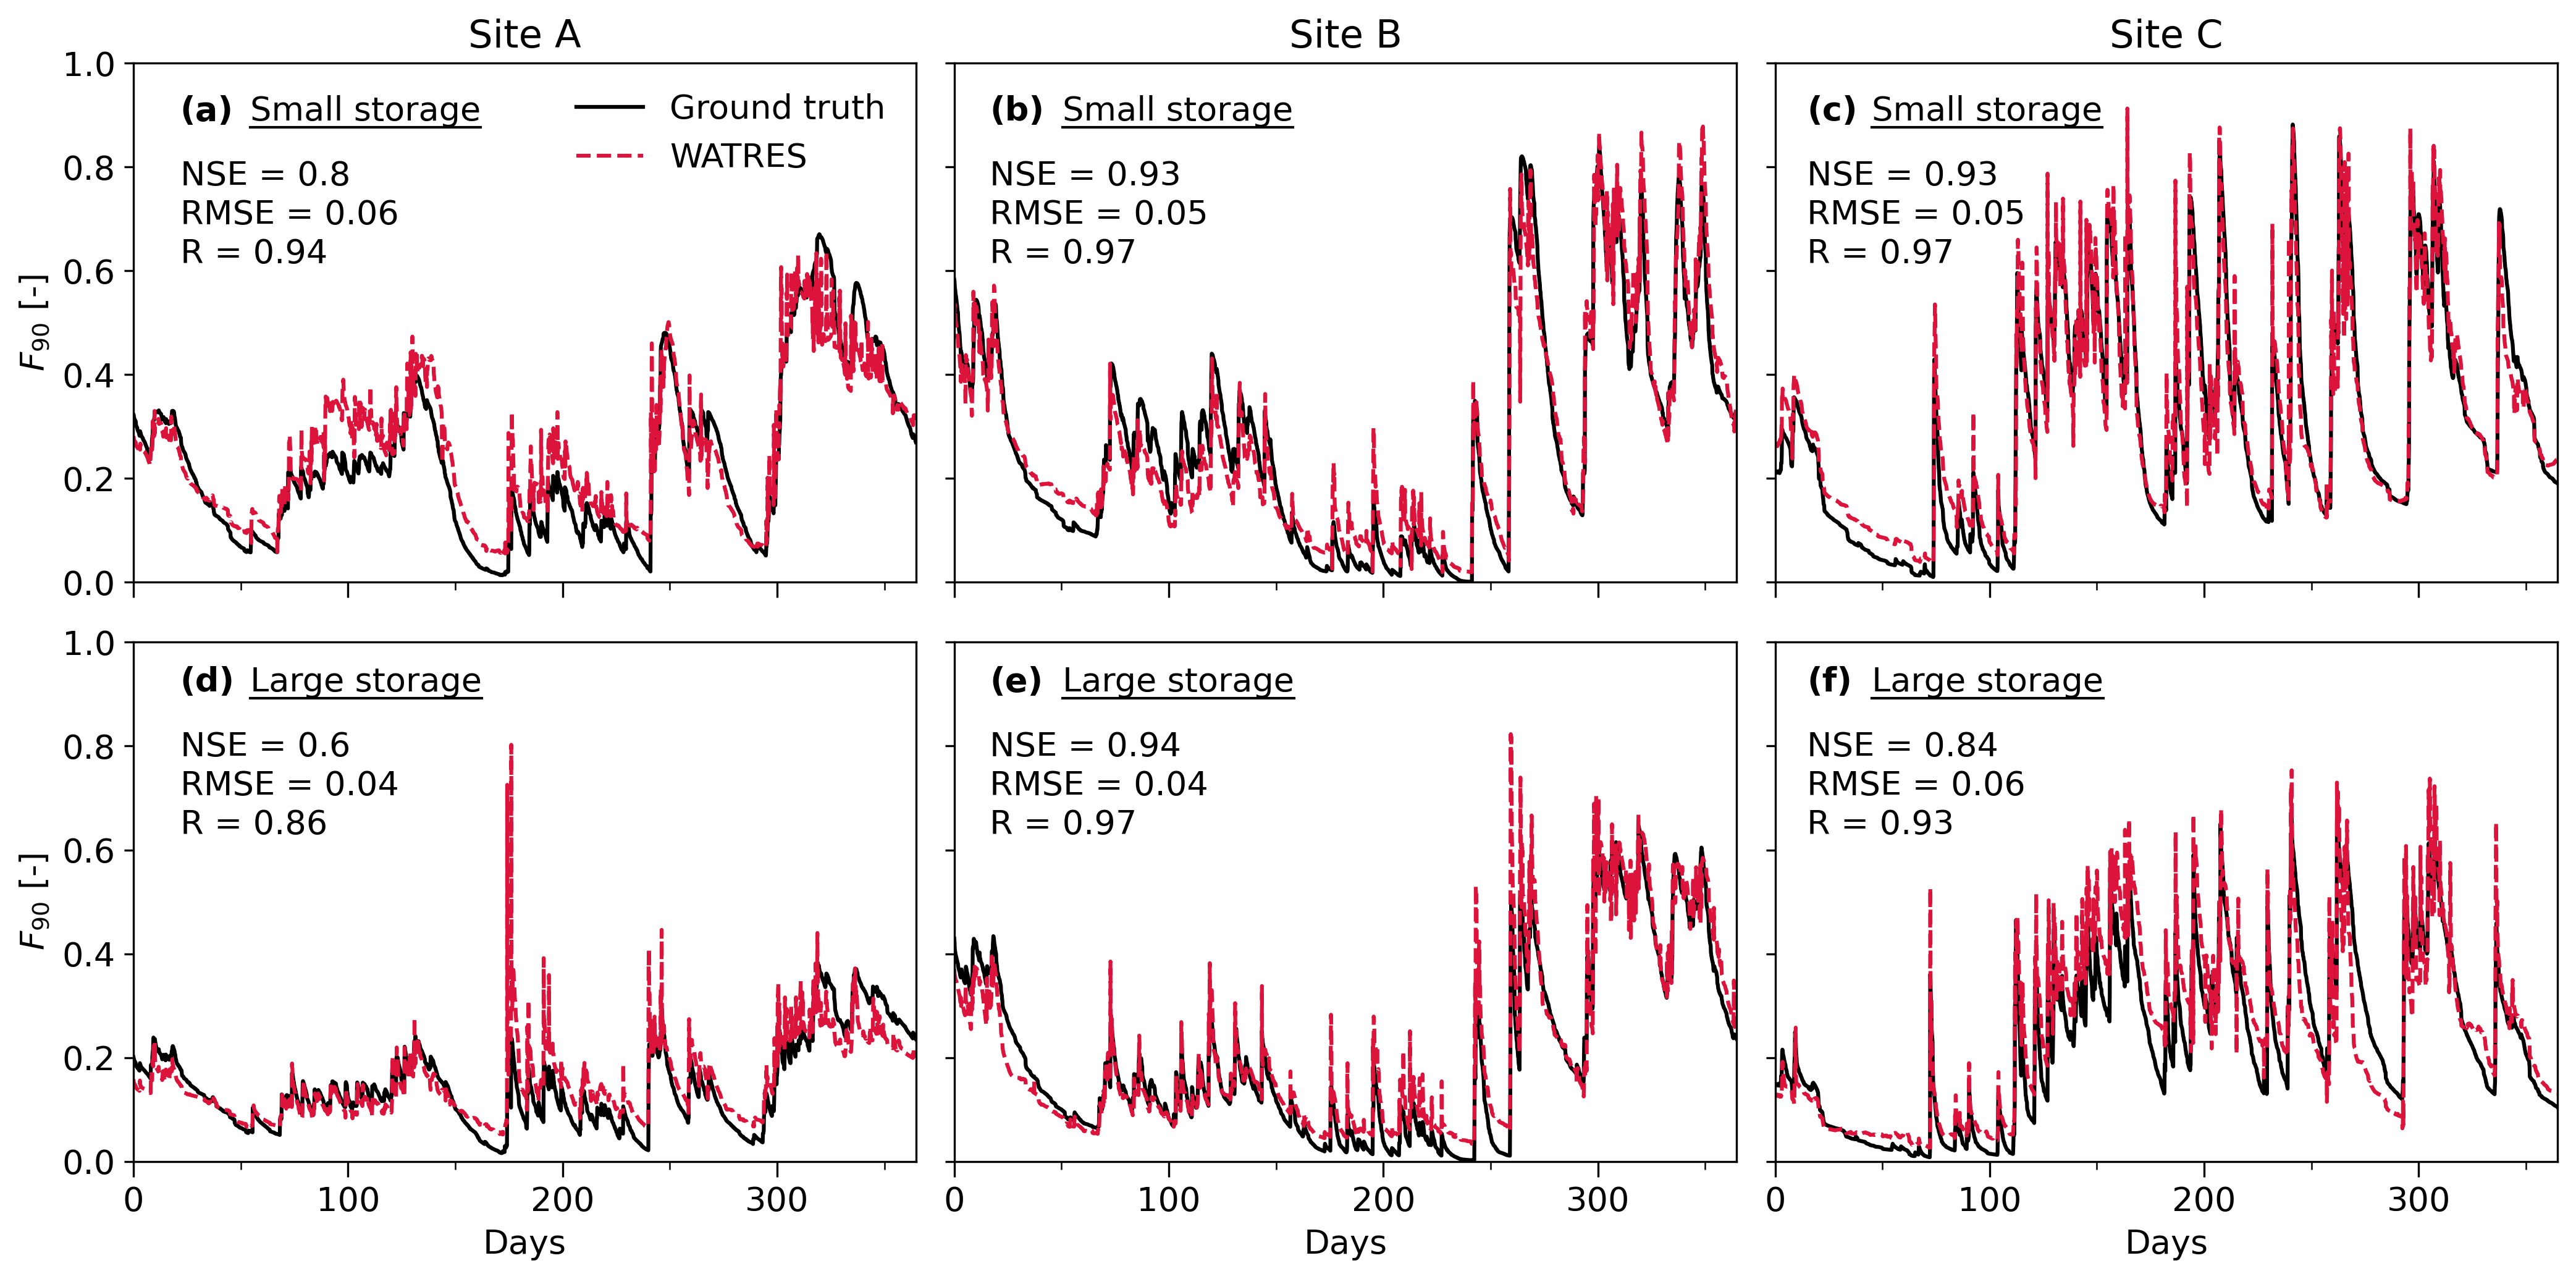

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(14,7), sharey=True, dpi=300)

idx_ywf = 2
lst_test = results_site_A_small['ywf_true'][:, idx_ywf]
lst_test = np.arange(len(lst_test)) / 10

# Site A
axs[0][0].plot(lst_test, results_site_A_small['ywf_true'][:, idx_ywf],  c='black',  label='Ground truth')
axs[0][0].plot(lst_test, results_site_A_small['ywfhat'][:, idx_ywf],  c='crimson', linestyle='--', label='WATRES')

axs[1][0].plot(lst_test, results_site_A_large['ywf_true'][:, idx_ywf],  c='black',  label='Ground truth')
axs[1][0].plot(lst_test, results_site_A_large['ywfhat'][:, idx_ywf],  c='crimson', linestyle='--', label='WATRES')

# Site B
axs[0][1].plot(lst_test, results_site_B_small['ywf_true'][:, idx_ywf],  c='black',  label='Ground truth')
axs[0][1].plot(lst_test, results_site_B_small['ywfhat'][:, idx_ywf],  c='crimson', linestyle='--', label='WATRES')

axs[1][1].plot(lst_test, results_site_B_large['ywf_true'][:, idx_ywf],  c='black',  label='Ground truth')
axs[1][1].plot(lst_test, results_site_B_large['ywfhat'][:, idx_ywf],  c='crimson', linestyle='--', label='WATRES')

# Site C
axs[0][2].plot(lst_test, results_site_C_small['ywf_true'][:, idx_ywf],  c='black',  label='Ground truth')
axs[0][2].plot(lst_test, results_site_C_small['ywfhat'][:, idx_ywf],  c='crimson', linestyle='--', label='WATRES')

axs[1][2].plot(lst_test, results_site_C_large['ywf_true'][:, idx_ywf],  c='black',  label='Ground truth')
axs[1][2].plot(lst_test, results_site_C_large['ywfhat'][:, idx_ywf],  c='crimson', linestyle='--', label='WATRES')

# Esthetics
font_size= 13

axs[0][0].set_ylim(ymin=0, ymax=1)
axs[1][0].set_ylim(ymin=0, ymax=1)

axs[0][0].set_ylabel(r'$F_{90}$ [-]', fontsize=font_size)
axs[1][0].set_ylabel(r'$F_{90}$ [-]', fontsize=font_size)

axs[1][0].set_xlabel('Days', fontsize=font_size)
axs[1][1].set_xlabel('Days', fontsize=font_size)
axs[1][2].set_xlabel('Days', fontsize=font_size)

axs[0][0].set_title('Site A', fontsize=font_size+2)
axs[0][1].set_title('Site B', fontsize=font_size+2)
axs[0][2].set_title('Site C', fontsize=font_size+2)

axs[0][0].set_xticklabels('')
axs[0][1].set_xticklabels('')
axs[0][2].set_xticklabels('')

axs[0][0].tick_params(axis='y', labelsize=font_size)
axs[1][0].tick_params(axis='y', labelsize=font_size)

axs[1][0].tick_params(axis='x', labelsize=font_size)
axs[1][1].tick_params(axis='x', labelsize=font_size)
axs[1][2].tick_params(axis='x', labelsize=font_size)

from matplotlib.ticker import MultipleLocator

# Define major and minor tick locators
major_locator = MultipleLocator(100)
minor_locator = MultipleLocator(50)

# Apply tick settings to second row (axs[1])
for ax in axs[1]:
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', which='major', labelsize=font_size, length=6)
    ax.tick_params(axis='x', which='minor', length=3)

# Ensure top row aligns (same ticks) but hides labels
for ax in axs[0]:
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', labelbottom=False)  # Hide x tick labels
    ax.tick_params(axis='x', which='major', length=6)
    ax.tick_params(axis='x', which='minor', length=3)

for j in range(2):
    for k in range(3):
        axs[j][k].set_xlim(xmin=lst_test[0], xmax=lst_test[-1])

axs[0][0].legend(loc='upper right', frameon=False, fontsize=font_size)

# Texts
fig.text(0.073, 0.9, '(a)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.385, 0.9, '(b)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.7, 0.9, '(c)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.073, 0.46, '(d)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.385, 0.46, '(e)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.7, 0.46, '(f)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)

from matplotlib.lines import Line2D

def add_underline(fig, x, y, text, fontsize):
    """
    Draw text and manually underline it.
    
    Parameters:
    - fig: The figure object
    - x, y: Coordinates for text (figure fraction)
    - text: The text string
    - fontsize: Font size
    """
    txt = fig.text(x, y, text, fontsize=fontsize, transform=fig.transFigure)
    
    # Estimate text width using renderer
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    inv = fig.transFigure.inverted()
    bbox_fig = inv.transform(bbox)

    # Draw an underline just below the text
    underline_y = y - 0.005
    fig.lines.append(Line2D([bbox_fig[0,0], bbox_fig[1,0]], [underline_y, underline_y],
                            transform=fig.transFigure, color='black', linewidth=1))

add_underline(fig, 0.1, 0.9, "Small storage", font_size)
add_underline(fig, 0.413, 0.9, "Small storage", font_size)
add_underline(fig, 0.725, 0.9, "Small storage", font_size)
add_underline(fig, 0.1, 0.46, "Large storage", font_size)
add_underline(fig, 0.413, 0.46, "Large storage", font_size)
add_underline(fig, 0.725, 0.46, "Large storage", font_size)

fig.text(0.073, 0.85, f"NSE = {str(round(nse(results_site_A_small['ywfhat'][:, idx_ywf], results_site_A_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.85, f"NSE = {str(round(nse(results_site_B_small['ywfhat'][:, idx_ywf], results_site_B_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.85, f"NSE = {str(round(nse(results_site_C_small['ywfhat'][:, idx_ywf], results_site_C_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.073, 0.41, f"NSE = {str(round(nse(results_site_A_large['ywfhat'][:, idx_ywf], results_site_A_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.41, f"NSE = {str(round(nse(results_site_B_large['ywfhat'][:, idx_ywf], results_site_B_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.41, f"NSE = {str(round(nse(results_site_C_large['ywfhat'][:, idx_ywf], results_site_C_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)

fig.text(0.073, 0.82, f"RMSE = {str(round(rmse(results_site_A_small['ywfhat'][:, idx_ywf], results_site_A_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.82, f"RMSE = {str(round(rmse(results_site_B_small['ywfhat'][:, idx_ywf], results_site_B_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.82, f"RMSE = {str(round(rmse(results_site_C_small['ywfhat'][:, idx_ywf], results_site_C_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.073, 0.38, f"RMSE = {str(round(rmse(results_site_A_large['ywfhat'][:, idx_ywf], results_site_A_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.38, f"RMSE = {str(round(rmse(results_site_B_large['ywfhat'][:, idx_ywf], results_site_B_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.38, f"RMSE = {str(round(rmse(results_site_C_large['ywfhat'][:, idx_ywf], results_site_C_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)

fig.text(0.073, 0.79, f"R = {str(round(correlation_coefficient(results_site_A_small['ywfhat'][:, idx_ywf], results_site_A_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.79, f"R = {str(round(correlation_coefficient(results_site_B_small['ywfhat'][:, idx_ywf], results_site_B_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.79, f"R = {str(round(correlation_coefficient(results_site_C_small['ywfhat'][:, idx_ywf], results_site_C_small['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.073, 0.35, f"R = {str(round(correlation_coefficient(results_site_A_large['ywfhat'][:, idx_ywf], results_site_A_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.385, 0.35, f"R = {str(round(correlation_coefficient(results_site_B_large['ywfhat'][:, idx_ywf], results_site_B_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)
fig.text(0.7, 0.35, f"R = {str(round(correlation_coefficient(results_site_C_large['ywfhat'][:, idx_ywf], results_site_C_large['ywf_true'][:, idx_ywf]), 2))}",
         fontsize=font_size, transform=plt.gcf().transFigure)

fig.tight_layout()

# Averaged TTD cdf WATRES

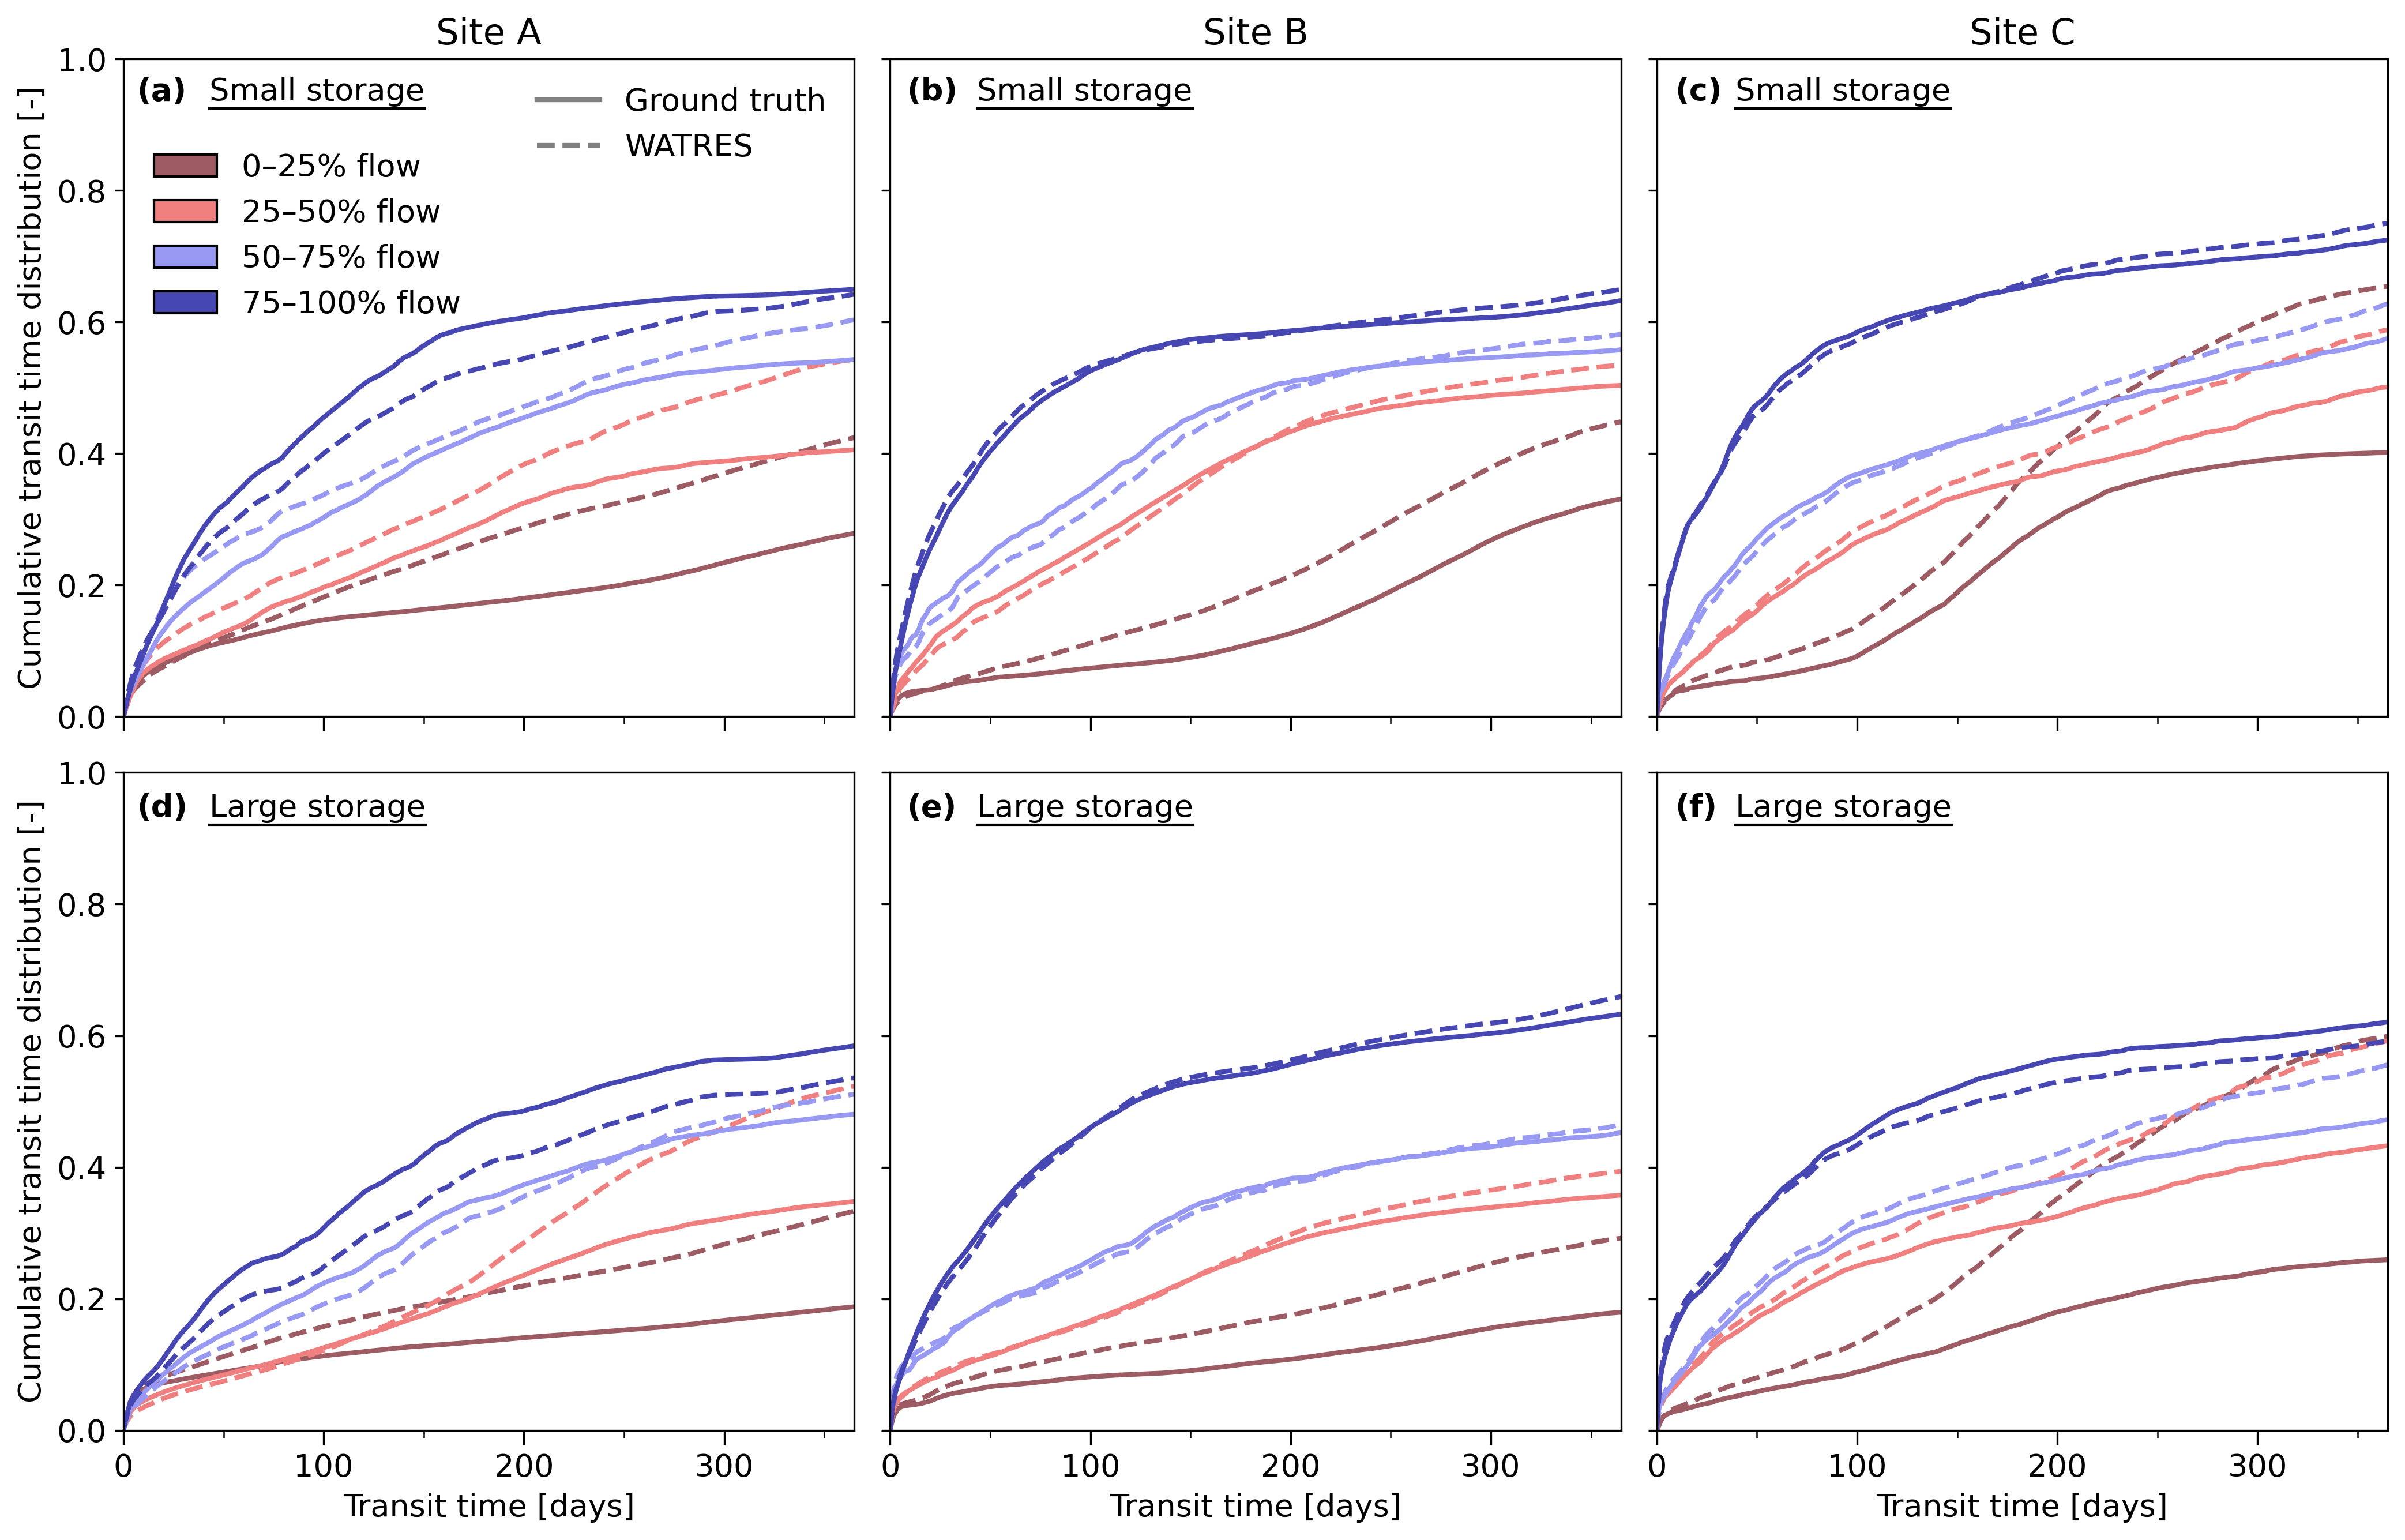

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(14,9), sharey=True, dpi=300)

len_age_array = 365 * 24
age_array = np.arange(len_age_array)

color_quantiles = ['#9D5C63', 'lightcoral', '#9799F2', '#4747B4']

lw = 2

# Site A
axs[0][0].plot(age_array, results_site_A_small['quantile0_PQtrue'][:len_age_array],  c=color_quantiles[0],  linewidth=lw, label='Ground truth')
axs[0][0].plot(age_array, results_site_A_small['quantile0_PQhat'][:len_age_array],  c=color_quantiles[0], linestyle='--', linewidth=lw, label='WATRES')
axs[0][0].plot(age_array, results_site_A_small['quantile1_PQtrue'][:len_age_array],  c=color_quantiles[1],  linewidth=lw, label='Ground truth')
axs[0][0].plot(age_array, results_site_A_small['quantile1_PQhat'][:len_age_array],  c=color_quantiles[1], linestyle='--', linewidth=lw, label='WATRES')
axs[0][0].plot(age_array, results_site_A_small['quantile2_PQtrue'][:len_age_array],  c=color_quantiles[2],  linewidth=lw, label='Ground truth')
axs[0][0].plot(age_array, results_site_A_small['quantile2_PQhat'][:len_age_array],  c=color_quantiles[2], linestyle='--', linewidth=lw, label='WATRES')
axs[0][0].plot(age_array, results_site_A_small['quantile3_PQtrue'][:len_age_array],  c=color_quantiles[3],  linewidth=lw, label='Ground truth')
axs[0][0].plot(age_array, results_site_A_small['quantile3_PQhat'][:len_age_array],  c=color_quantiles[3], linestyle='--', linewidth=lw, label='WATRES')

axs[1][0].plot(age_array, results_site_A_large['quantile0_PQtrue'][:len_age_array],  c=color_quantiles[0],  linewidth=lw, label='Ground truth')
axs[1][0].plot(age_array, results_site_A_large['quantile0_PQhat'][:len_age_array],  c=color_quantiles[0], linestyle='--', linewidth=lw, label='WATRES')
axs[1][0].plot(age_array, results_site_A_large['quantile1_PQtrue'][:len_age_array],  c=color_quantiles[1], linewidth=lw, label='Ground truth')
axs[1][0].plot(age_array, results_site_A_large['quantile1_PQhat'][:len_age_array],  c=color_quantiles[1], linestyle='--', linewidth=lw, label='WATRES')
axs[1][0].plot(age_array, results_site_A_large['quantile2_PQtrue'][:len_age_array],  c=color_quantiles[2], linewidth=lw, label='Ground truth')
axs[1][0].plot(age_array, results_site_A_large['quantile2_PQhat'][:len_age_array],  c=color_quantiles[2], linestyle='--', linewidth=lw, label='WATRES')
axs[1][0].plot(age_array, results_site_A_large['quantile3_PQtrue'][:len_age_array],  c=color_quantiles[3], linewidth=lw, label='Ground truth')
axs[1][0].plot(age_array, results_site_A_large['quantile3_PQhat'][:len_age_array],  c=color_quantiles[3], linestyle='--', linewidth=lw, label='WATRES')

# Site B
axs[0][1].plot(age_array, results_site_B_small['quantile0_PQtrue'][:len_age_array],  c=color_quantiles[0], linewidth=lw, label='Ground truth')
axs[0][1].plot(age_array, results_site_B_small['quantile0_PQhat'][:len_age_array],  c=color_quantiles[0], linestyle='--', linewidth=lw, label='WATRES')
axs[0][1].plot(age_array, results_site_B_small['quantile1_PQtrue'][:len_age_array],  c=color_quantiles[1], linewidth=lw, label='Ground truth')
axs[0][1].plot(age_array, results_site_B_small['quantile1_PQhat'][:len_age_array],  c=color_quantiles[1], linestyle='--', linewidth=lw, label='WATRES')
axs[0][1].plot(age_array, results_site_B_small['quantile2_PQtrue'][:len_age_array],  c=color_quantiles[2], linewidth=lw, label='Ground truth')
axs[0][1].plot(age_array, results_site_B_small['quantile2_PQhat'][:len_age_array],  c=color_quantiles[2], linestyle='--', linewidth=lw, label='WATRES')
axs[0][1].plot(age_array, results_site_B_small['quantile3_PQtrue'][:len_age_array],  c=color_quantiles[3], linewidth=lw, label='Ground truth')
axs[0][1].plot(age_array, results_site_B_small['quantile3_PQhat'][:len_age_array],  c=color_quantiles[3], linestyle='--', linewidth=lw, label='WATRES')

axs[1][1].plot(age_array, results_site_B_large['quantile0_PQtrue'][:len_age_array],  c=color_quantiles[0], linewidth=lw, label='Ground truth')
axs[1][1].plot(age_array, results_site_B_large['quantile0_PQhat'][:len_age_array],  c=color_quantiles[0], linestyle='--', linewidth=lw, label='WATRES')
axs[1][1].plot(age_array, results_site_B_large['quantile1_PQtrue'][:len_age_array],  c=color_quantiles[1], linewidth=lw, label='Ground truth')
axs[1][1].plot(age_array, results_site_B_large['quantile1_PQhat'][:len_age_array],  c=color_quantiles[1], linestyle='--', linewidth=lw, label='WATRES')
axs[1][1].plot(age_array, results_site_B_large['quantile2_PQtrue'][:len_age_array],  c=color_quantiles[2], linewidth=lw, label='Ground truth')
axs[1][1].plot(age_array, results_site_B_large['quantile2_PQhat'][:len_age_array],  c=color_quantiles[2], linestyle='--', linewidth=lw, label='WATRES')
axs[1][1].plot(age_array, results_site_B_large['quantile3_PQtrue'][:len_age_array],  c=color_quantiles[3], linewidth=lw, label='Ground truth')
axs[1][1].plot(age_array, results_site_B_large['quantile3_PQhat'][:len_age_array],  c=color_quantiles[3], linestyle='--', linewidth=lw, label='WATRES')

# Site C
axs[0][2].plot(age_array, results_site_C_small['quantile0_PQtrue'][:len_age_array],  c=color_quantiles[0], linewidth=lw, label='Ground truth')
axs[0][2].plot(age_array, results_site_C_small['quantile0_PQhat'][:len_age_array],  c=color_quantiles[0], linestyle='--', linewidth=lw, label='WATRES')
axs[0][2].plot(age_array, results_site_C_small['quantile1_PQtrue'][:len_age_array],  c=color_quantiles[1], linewidth=lw, label='Ground truth')
axs[0][2].plot(age_array, results_site_C_small['quantile1_PQhat'][:len_age_array],  c=color_quantiles[1], linestyle='--', linewidth=lw, label='WATRES')
axs[0][2].plot(age_array, results_site_C_small['quantile2_PQtrue'][:len_age_array],  c=color_quantiles[2], linewidth=lw, label='Ground truth')
axs[0][2].plot(age_array, results_site_C_small['quantile2_PQhat'][:len_age_array],  c=color_quantiles[2], linestyle='--', linewidth=lw, label='WATRES')
axs[0][2].plot(age_array, results_site_C_small['quantile3_PQtrue'][:len_age_array],  c=color_quantiles[3], linewidth=lw, label='Ground truth')
axs[0][2].plot(age_array, results_site_C_small['quantile3_PQhat'][:len_age_array],  c=color_quantiles[3], linestyle='--', linewidth=lw, label='WATRES')

axs[1][2].plot(age_array, results_site_C_large['quantile0_PQtrue'][:len_age_array],  c=color_quantiles[0], linewidth=lw, label='Ground truth')
axs[1][2].plot(age_array, results_site_C_large['quantile0_PQhat'][:len_age_array],  c=color_quantiles[0], linestyle='--', linewidth=lw, label='WATRES')
axs[1][2].plot(age_array, results_site_C_large['quantile1_PQtrue'][:len_age_array],  c=color_quantiles[1], linewidth=lw, label='Ground truth')
axs[1][2].plot(age_array, results_site_C_large['quantile1_PQhat'][:len_age_array],  c=color_quantiles[1], linestyle='--', linewidth=lw, label='WATRES')
axs[1][2].plot(age_array, results_site_C_large['quantile2_PQtrue'][:len_age_array],  c=color_quantiles[2], linewidth=lw, label='Ground truth')
axs[1][2].plot(age_array, results_site_C_large['quantile2_PQhat'][:len_age_array],  c=color_quantiles[2], linestyle='--', linewidth=lw, label='WATRES')
axs[1][2].plot(age_array, results_site_C_large['quantile3_PQtrue'][:len_age_array],  c=color_quantiles[3], linewidth=lw, label='Ground truth')
axs[1][2].plot(age_array, results_site_C_large['quantile3_PQhat'][:len_age_array],  c=color_quantiles[3], linestyle='--', linewidth=lw, label='WATRES')

# Esthetics
font_size= 13

axs[0][0].set_ylim(ymin=0, ymax=1)
axs[1][0].set_ylim(ymin=0, ymax=1)

axs[0][0].set_ylabel(r'Cumulative transit time distribution [-]', fontsize=font_size)
axs[1][0].set_ylabel(r'Cumulative transit time distribution [-]', fontsize=font_size)

axs[1][0].set_xlabel('Transit time [days]', fontsize=font_size)
axs[1][1].set_xlabel('Transit time [days]', fontsize=font_size)
axs[1][2].set_xlabel('Transit time [days]', fontsize=font_size)

axs[0][0].set_title('Site A', fontsize=font_size+2)
axs[0][1].set_title('Site B', fontsize=font_size+2)
axs[0][2].set_title('Site C', fontsize=font_size+2)

axs[0][0].set_xticklabels('')
axs[0][1].set_xticklabels('')
axs[0][2].set_xticklabels('')

axs[0][0].tick_params(axis='y', labelsize=font_size)
axs[1][0].tick_params(axis='y', labelsize=font_size)

axs[1][0].tick_params(axis='x', labelsize=font_size)
axs[1][1].tick_params(axis='x', labelsize=font_size)
axs[1][2].tick_params(axis='x', labelsize=font_size)

from matplotlib.ticker import MultipleLocator

major_locator = MultipleLocator(100 * 24)
minor_locator = MultipleLocator(50 * 24)

for ax in axs[1]:
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', which='major', labelsize=font_size, length=6)
    ax.tick_params(axis='x', which='minor', length=3)

for ax in axs[0]:
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', labelbottom=False)  # Hide x tick labels
    ax.tick_params(axis='x', which='major', length=6)
    ax.tick_params(axis='x', which='minor', length=3)

major_tick_locs = np.arange(0, len_age_array + 1, 100 * 24)
major_tick_labels = [str(int(x / 24)) for x in major_tick_locs]  # convert hours to days

for ax in axs[1]:
    ax.set_xticks(major_tick_locs)
    ax.set_xticklabels(major_tick_labels, fontsize=font_size)

for ax in axs[0]:
    ax.set_xticks(major_tick_locs)
    ax.set_xticklabels([''] * len(major_tick_locs))  # blank labels

for j in range(2):
    for k in range(3):
        axs[j][k].set_xlim(xmin=0, xmax=len_age_array)

# Custom legends
custom_lines = [
    Line2D([0], [0], color='grey', linestyle='-', linewidth=2, label='Ground truth'),
    Line2D([0], [0], color='grey', linestyle='--', linewidth=2, label='WATRES')
]
legend1 = axs[0][0].legend(
    handles=custom_lines,
    loc='upper right',
    frameon=False,
    fontsize=font_size
)

axs[0][0].add_artist(legend1)

from matplotlib.patches import Patch

color_quantiles = ['#9D5C63', 'lightcoral', '#9799F2', '#4747B4']
quantile_labels = ['0–25% flow', '25–50% flow', '50–75% flow', '75–100% flow']
quantile_patches = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for color, label in zip(color_quantiles, quantile_labels)
]

axs[0][0].legend(
    handles=quantile_patches,
    loc='upper right',
    bbox_to_anchor=(.5, .9),  # move down slightly below the first legend
    frameon=False,
    fontsize=font_size
)

# Texts
fig.text(0.06, 0.93, '(a)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.378, 0.93, '(b)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.695, 0.93, '(c)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.06, 0.47, '(d)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.378, 0.47, '(e)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.695, 0.47, '(f)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)

from matplotlib.lines import Line2D

def add_underline(fig, x, y, text, fontsize):
    """
    Draw text and manually underline it.
    
    Parameters:
    - fig: The figure object
    - x, y: Coordinates for text (figure fraction)
    - text: The text string
    - fontsize: Font size
    """
    txt = fig.text(x, y, text, fontsize=fontsize, transform=fig.transFigure)
    
    # Estimate text width using renderer
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    inv = fig.transFigure.inverted()
    bbox_fig = inv.transform(bbox)

    # Draw an underline just below the text
    underline_y = y - 0.005
    fig.lines.append(Line2D([bbox_fig[0,0], bbox_fig[1,0]], [underline_y, underline_y],
                            transform=fig.transFigure, color='black', linewidth=1))

add_underline(fig, 0.09, 0.93, "Small storage", font_size)
add_underline(fig, 0.407, 0.93, "Small storage", font_size)
add_underline(fig, 0.72, 0.93, "Small storage", font_size)
add_underline(fig, 0.09, 0.47, "Large storage", font_size)
add_underline(fig, 0.407, 0.47, "Large storage", font_size)
add_underline(fig, 0.72, 0.47, "Large storage", font_size)

fig.tight_layout()

# ERRA comparison

### Collect data

In [11]:
from scipy.interpolate import interp1d

# getting dates at the hour resolution used to test
hours_test = np.array([fractional_year_to_datetime(el) for el in np.array(results[sites[0]][algos[0]]['timeyear_test'])])

## Getting results from EHS
res_EHS = {}
for site in sites:
    res_EHS[site] = {}
    EHS_global = pd.read_csv(os.path.join(path_data, 'EHS', site, 'EHS_global.txt'), sep=' ')
    res_EHS[site]['TTD_lag'] = EHS_global['TTD_lag'].to_numpy().reshape(-1) * (24*7)
    res_EHS[site]['globalPQ'] = np.cumsum(EHS_global['TTD.TTD'].to_numpy().reshape(-1))
    res_EHS[site]['globalPQ_se'] = np.cumsum(EHS_global['TTD.TTD_se'].to_numpy().reshape(-1))

    res_EHS[site]['globalpQ'] = (EHS_global['TTD.TTD'].to_numpy().reshape(-1))
    res_EHS[site]['globalpQ_se'] = (EHS_global['TTD.TTD_se'].to_numpy().reshape(-1))

    x_vals = EHS_global['TTD_lag'].to_numpy().reshape(-1)
    y_vals = res_EHS[site]['globalPQ']
    f = interp1d(x_vals, y_vals, kind='linear', fill_value="extrapolate")
    res_EHS[site]['ywfhat'] = (np.array([f(i*4) for i in range(1,11)])).reshape(1,-1)
    for k in range(4):
        EHS_quantile = pd.read_csv(os.path.join(path_data, 'EHS', site, 'EHS_quantile{0}.txt'.format(k)), sep=' ') 
        res_EHS[site]['quantile{0}_PQ'.format(k)] = np.cumsum(EHS_quantile['QquantileTTD.TTD'].to_numpy().reshape(-1))
        y_vals = res_EHS[site]['quantile{0}_PQ'.format(k)]
        f = interp1d(x_vals, y_vals, kind='linear', fill_value="extrapolate")
        res_EHS[site]['quantile{0}_ywfhat'.format(k)] = (np.array([f(i*4) for i in range(1,11)]))

In [12]:
# Prepare data for plotting
len_age_array = 365 * 24
moving_avg_len = 3  # days

avg_TTD_site_A_large_GT = np.convolve(np.diff(results_site_A_large['global_PQtrue'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_TTD_site_A_small_GT = np.convolve(np.diff(results_site_A_small['global_PQtrue'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_TTD_site_B_large_GT = np.convolve(np.diff(results_site_B_large['global_PQtrue'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_TTD_site_B_small_GT = np.convolve(np.diff(results_site_B_small['global_PQtrue'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_TTD_site_C_large_GT = np.convolve(np.diff(results_site_C_large['global_PQtrue'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_TTD_site_C_small_GT = np.convolve(np.diff(results_site_C_small['global_PQtrue'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_TTD_site_A_large_WATRES = np.convolve(np.diff(results_site_A_large['global_PQhat'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_TTD_site_A_small_WATRES = np.convolve(np.diff(results_site_A_small['global_PQhat'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_TTD_site_B_large_WATRES = np.convolve(np.diff(results_site_B_large['global_PQhat'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_TTD_site_B_small_WATRES = np.convolve(np.diff(results_site_B_small['global_PQhat'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_TTD_site_C_large_WATRES = np.convolve(np.diff(results_site_C_large['global_PQhat'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_TTD_site_C_small_WATRES = np.convolve(np.diff(results_site_C_small['global_PQhat'][:len_age_array]), np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

# CDF values
avg_cdf_TTD_site_A_large_GT = np.convolve(results_site_A_large['global_PQtrue'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_cdf_TTD_site_A_small_GT = np.convolve(results_site_A_small['global_PQtrue'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_cdf_TTD_site_B_large_GT = np.convolve(results_site_B_large['global_PQtrue'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_cdf_TTD_site_B_small_GT = np.convolve(results_site_B_small['global_PQtrue'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_cdf_TTD_site_C_large_GT = np.convolve(results_site_C_large['global_PQtrue'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_cdf_TTD_site_C_small_GT = np.convolve(results_site_C_small['global_PQtrue'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_cdf_TTD_site_A_large_WATRES = np.convolve(results_site_A_large['global_PQhat'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_cdf_TTD_site_A_small_WATRES = np.convolve(results_site_A_small['global_PQhat'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_cdf_TTD_site_B_large_WATRES = np.convolve(results_site_B_large['global_PQhat'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_cdf_TTD_site_B_small_WATRES = np.convolve(results_site_B_small['global_PQhat'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

avg_cdf_TTD_site_C_large_WATRES = np.convolve(results_site_C_large['global_PQhat'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')
avg_cdf_TTD_site_C_small_WATRES = np.convolve(results_site_C_small['global_PQhat'][:len_age_array], np.ones(24*moving_avg_len)/(24*moving_avg_len), mode='same')

### PDF version

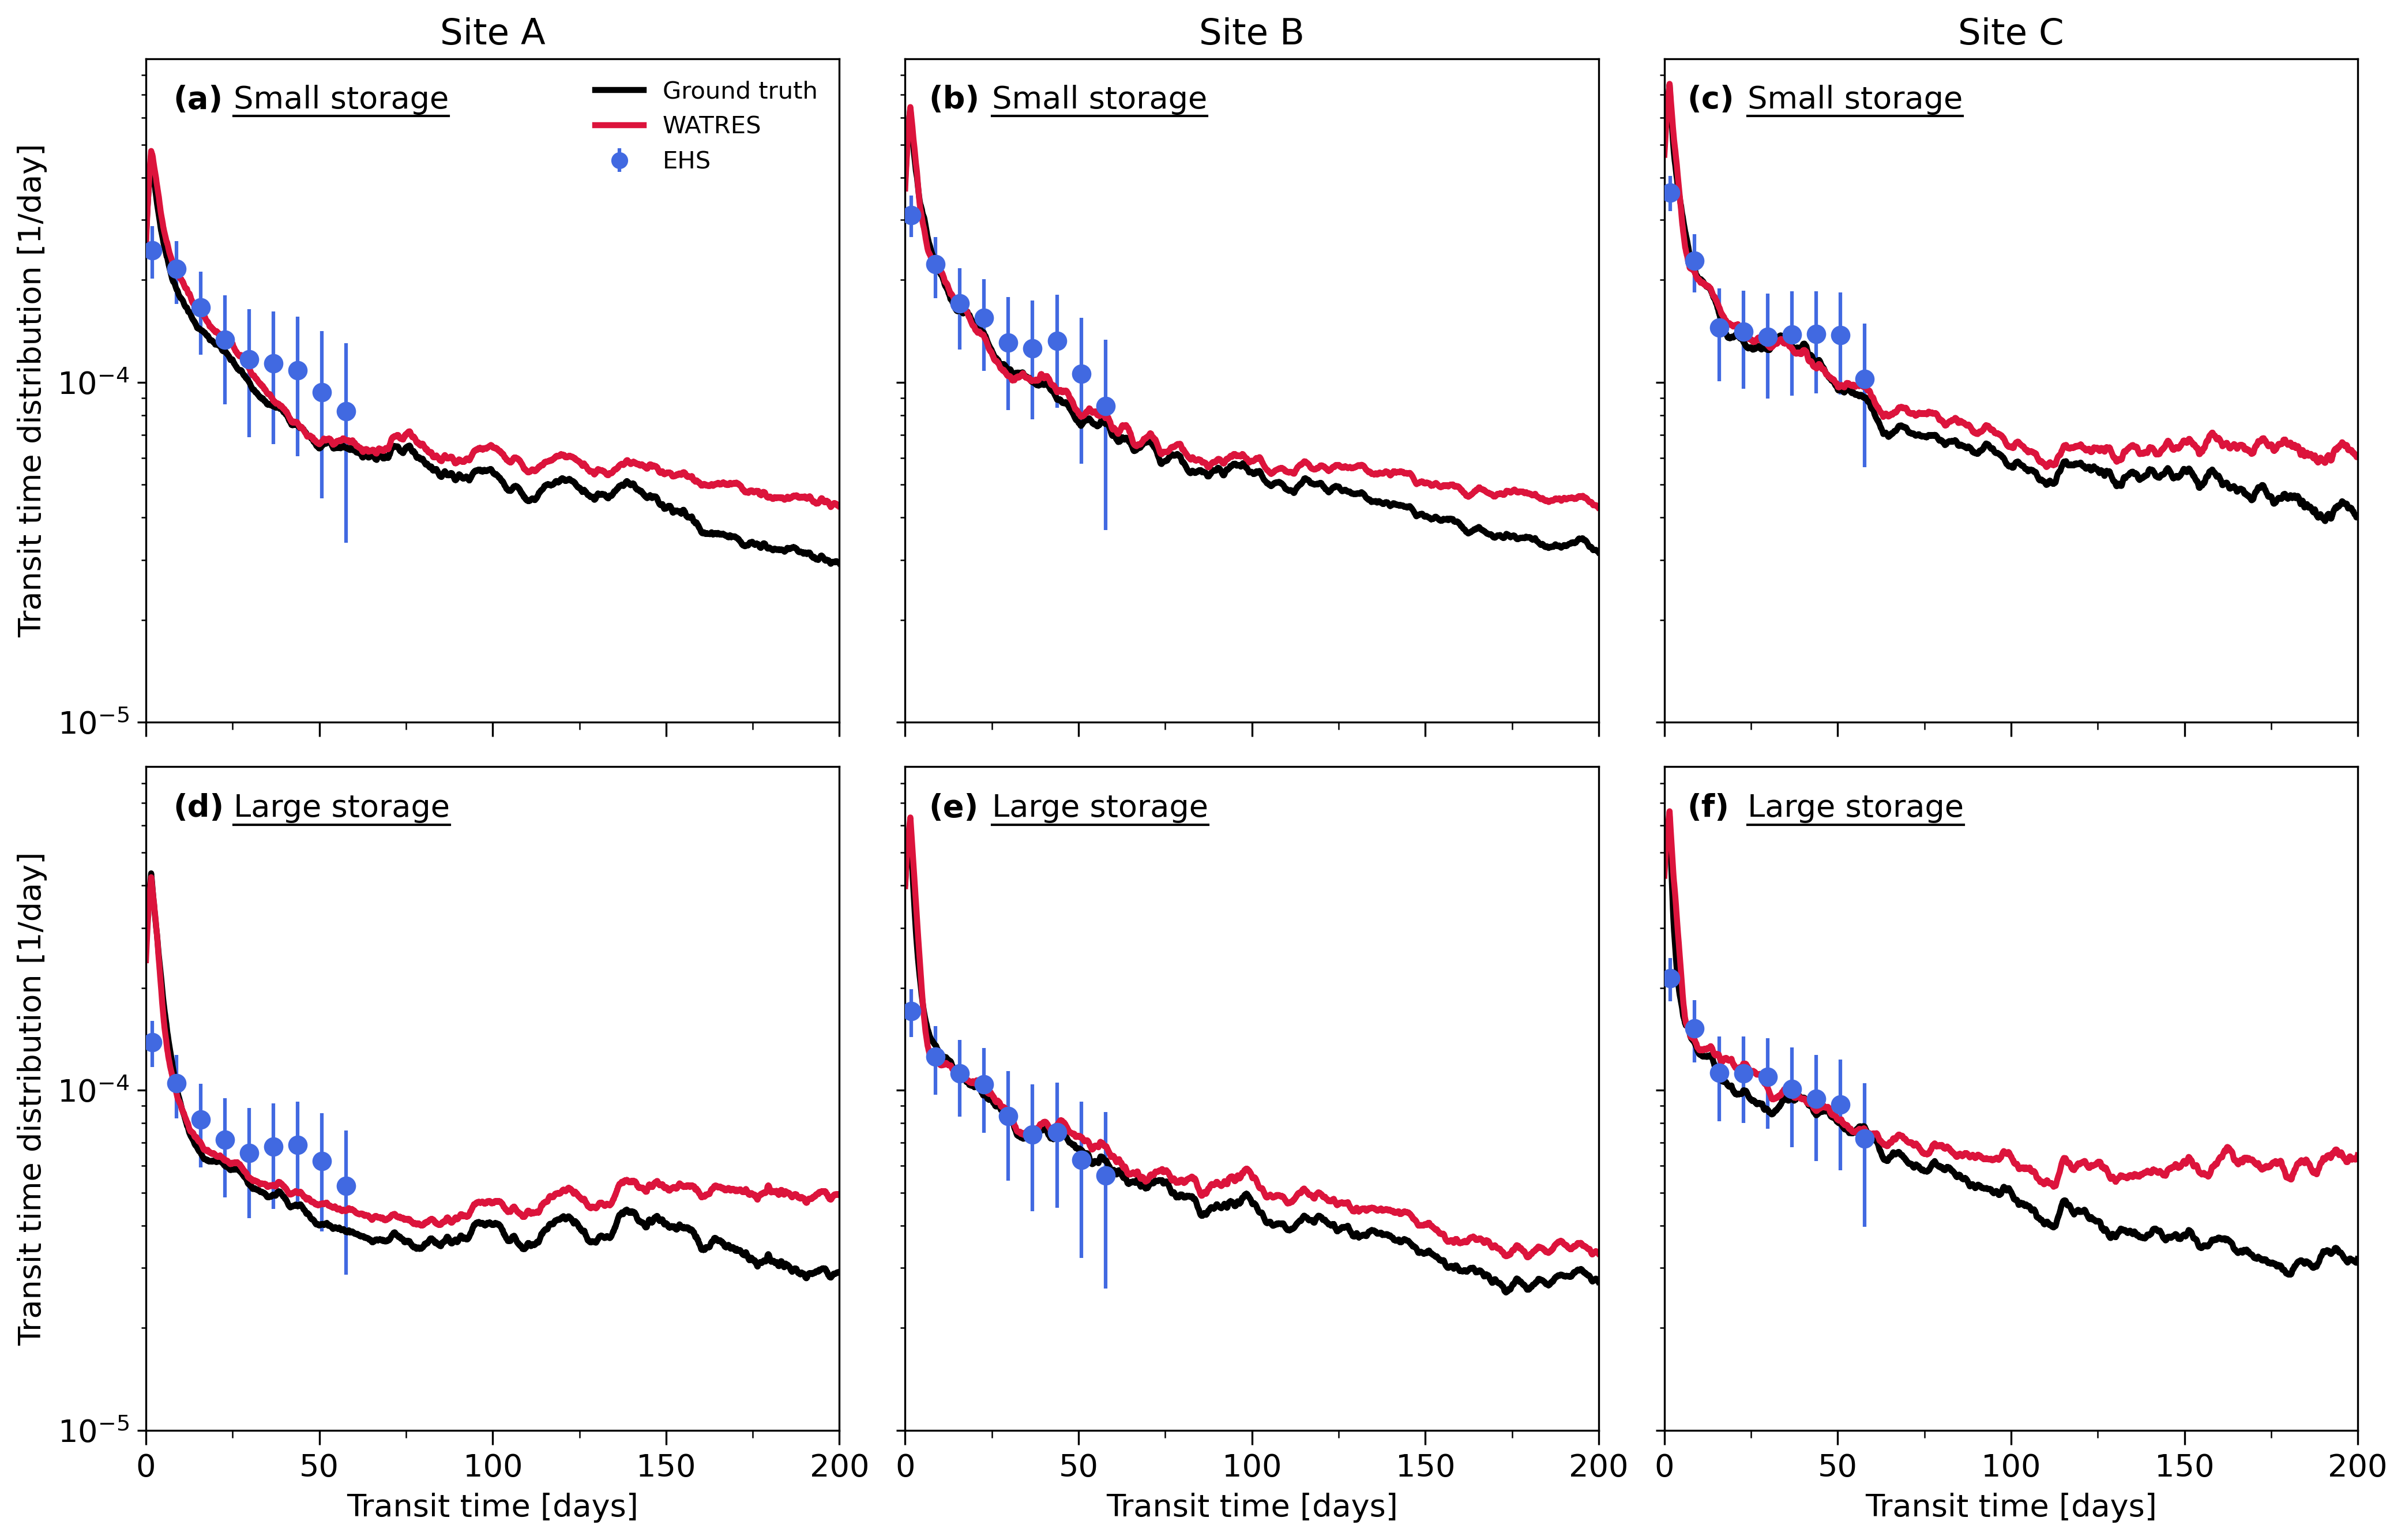

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(14, 9), sharey=True, dpi=300)

Tmax = 200 * 24
lw = 2.5
maxEHS = 5
ms = 6
ms_ = 50

colors = ['black', 'crimson', 'royalblue']

# Site A
axs[0][0].plot(avg_TTD_site_A_small_GT[:Tmax], linestyle='-', c=colors[0], linewidth=lw, label='Ground truth')
axs[0][0].plot(avg_TTD_site_A_small_WATRES[:Tmax], linestyle='-', c=colors[1], linewidth=lw, label='WATRES')
axs[0][0].errorbar(
    res_EHS['Basel_small_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Basel_small_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Basel_small_storage']['TTD_lag'][:-maxEHS]),
    yerr=np.diff(res_EHS['Basel_small_storage']['globalPQ_se'][:-maxEHS]) / np.diff(res_EHS['Basel_small_storage']['TTD_lag'][:-maxEHS]),
    fmt='o', color=colors[2], capsize=0, markersize=ms, label='EHS', zorder=0
)
axs[0][0].scatter(
    res_EHS['Basel_small_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Basel_small_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Basel_small_storage']['TTD_lag'][:-maxEHS]),
    s=ms_, c=colors[2], zorder=10
)

axs[1][0].plot(avg_TTD_site_A_large_GT[:Tmax], linestyle='-', c=colors[0], linewidth=lw)
axs[1][0].plot(avg_TTD_site_A_large_WATRES[:Tmax], linestyle='-', c=colors[1], linewidth=lw)
axs[1][0].errorbar(
    res_EHS['Basel_large_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Basel_large_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Basel_large_storage']['TTD_lag'][:-maxEHS]),
    yerr=np.diff(res_EHS['Basel_large_storage']['globalPQ_se'][:-maxEHS]) / np.diff(res_EHS['Basel_large_storage']['TTD_lag'][:-maxEHS]),
    fmt='o', color=colors[2], capsize=0, markersize=ms, zorder=0
)
axs[1][0].scatter(
    res_EHS['Basel_large_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Basel_large_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Basel_large_storage']['TTD_lag'][:-maxEHS]),
    s=ms_, c=colors[2], zorder=10
)

# Site B
axs[0][1].plot(avg_TTD_site_B_small_GT[:Tmax], linestyle='-', linewidth=lw, c=colors[0])
axs[0][1].plot(avg_TTD_site_B_small_WATRES[:Tmax], linestyle='-', linewidth=lw, c=colors[1])
axs[0][1].errorbar(
    res_EHS['Pully_small_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Pully_small_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Pully_small_storage']['TTD_lag'][:-maxEHS]),
    yerr=np.diff(res_EHS['Pully_small_storage']['globalPQ_se'][:-maxEHS]) / np.diff(res_EHS['Pully_small_storage']['TTD_lag'][:-maxEHS]),
    fmt='o', color=colors[2], capsize=0, markersize=ms, zorder=0
)
axs[0][1].scatter(
    res_EHS['Pully_small_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Pully_small_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Pully_small_storage']['TTD_lag'][:-maxEHS]),
    s=ms_, c=colors[2], zorder=10
)

axs[1][1].plot(avg_TTD_site_B_large_GT[:Tmax], linestyle='-', linewidth=lw, c=colors[0])
axs[1][1].plot(avg_TTD_site_B_large_WATRES[:Tmax], linestyle='-', linewidth=lw, c=colors[1])
axs[1][1].errorbar(
    res_EHS['Pully_large_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Pully_large_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Pully_large_storage']['TTD_lag'][:-maxEHS]),
    yerr=np.diff(res_EHS['Pully_large_storage']['globalPQ_se'][:-maxEHS]) / np.diff(res_EHS['Pully_large_storage']['TTD_lag'][:-maxEHS]),
    fmt='o', color=colors[2], capsize=0, markersize=ms, zorder=0
)
axs[1][1].scatter(
    res_EHS['Pully_large_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Pully_large_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Pully_large_storage']['TTD_lag'][:-maxEHS]),
    s=ms_, c=colors[2], zorder=10
)

# Site C
axs[0][2].plot(avg_TTD_site_C_small_GT[:Tmax], linestyle='-', linewidth=lw, c=colors[0])
axs[0][2].plot(avg_TTD_site_C_small_WATRES[:Tmax], linestyle='-', linewidth=lw, c=colors[1])
axs[0][2].errorbar(
    res_EHS['Lugano_small_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Lugano_small_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Lugano_small_storage']['TTD_lag'][:-maxEHS]),
    yerr=np.diff(res_EHS['Lugano_small_storage']['globalPQ_se'][:-maxEHS]) / np.diff(res_EHS['Lugano_small_storage']['TTD_lag'][:-maxEHS]),
    fmt='o', color=colors[2], capsize=0, markersize=ms, zorder=0
)
axs[0][2].scatter(
    res_EHS['Lugano_small_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Lugano_small_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Lugano_small_storage']['TTD_lag'][:-maxEHS]),
    s=ms_, c=colors[2], zorder=10
)

axs[1][2].plot(avg_TTD_site_C_large_GT[:Tmax], linestyle='-', linewidth=lw, c=colors[0])
axs[1][2].plot(avg_TTD_site_C_large_WATRES[:Tmax], linestyle='-', linewidth=lw, c=colors[1])
axs[1][2].errorbar(
    res_EHS['Lugano_large_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Lugano_large_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Lugano_large_storage']['TTD_lag'][:-maxEHS]),
    yerr=np.diff(res_EHS['Lugano_large_storage']['globalPQ_se'][:-maxEHS]) / np.diff(res_EHS['Lugano_large_storage']['TTD_lag'][:-maxEHS]),
    fmt='o', color=colors[2], capsize=0, markersize=ms, zorder=0
)
axs[1][2].scatter(
    res_EHS['Lugano_large_storage']['TTD_lag'][:-(maxEHS+1)],
    np.diff(res_EHS['Lugano_large_storage']['globalPQ'][:-maxEHS]) / np.diff(res_EHS['Lugano_large_storage']['TTD_lag'][:-maxEHS]),
    s=ms_, c=colors[2], zorder=10
)

# Esthetics
axs[0][0].legend(frameon=False, loc='upper right')

for ax in axs.flatten():
    ax.set_yscale('log')

font_size= 13

axs[0][0].set_ylim(ymin=1E-5)
axs[1][0].set_ylim(ymin=1E-5)

axs[0][0].set_title('Site A', fontsize=font_size+2)
axs[0][1].set_title('Site B', fontsize=font_size+2)
axs[0][2].set_title('Site C', fontsize=font_size+2)

axs[0][0].set_ylabel(r'Transit time distribution [1/day]', fontsize=font_size)
axs[1][0].set_ylabel(r'Transit time distribution [1/day]', fontsize=font_size)

axs[1][0].set_xlabel('Transit time [days]', fontsize=font_size)
axs[1][1].set_xlabel('Transit time [days]', fontsize=font_size)
axs[1][2].set_xlabel('Transit time [days]', fontsize=font_size)

axs[0][0].tick_params(axis='y', labelsize=font_size)
axs[1][0].tick_params(axis='y', labelsize=font_size)

axs[1][0].tick_params(axis='x', labelsize=font_size)
axs[1][1].tick_params(axis='x', labelsize=font_size)
axs[1][2].tick_params(axis='x', labelsize=font_size)

from matplotlib.ticker import MultipleLocator

major_locator = MultipleLocator(50 * 24)
minor_locator = MultipleLocator(25 * 24)

for ax in axs.flatten():
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(axis='x', which='major', labelsize=font_size, length=6)
    ax.tick_params(axis='x', which='minor', length=3)

major_tick_locs = np.arange(0, len_age_array + 1, 50 * 24)
major_tick_labels = [str(int(x / 24)) for x in major_tick_locs]  # convert hours to days

for ax in axs[0]:
    ax.set_xticklabels('')

for ax in axs[1]:
    ax.set_xticks(major_tick_locs)
    ax.set_xticklabels(major_tick_labels, fontsize=font_size)

for ax in axs.flatten():
    ax.set_xlim(xmin=0, xmax=Tmax)

# Texts
fig.text(0.075, 0.925, '(a)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.387, 0.925, '(b)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.700, 0.925, '(c)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.075, 0.47, '(d)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.387, 0.47, '(e)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.700, 0.47, '(f)', fontsize=font_size, weight='bold', transform=plt.gcf().transFigure)

from matplotlib.lines import Line2D

def add_underline(fig, x, y, text, fontsize):
    """
    Draw text and manually underline it.
    
    Parameters:
    - fig: The figure object
    - x, y: Coordinates for text (figure fraction)
    - text: The text string
    - fontsize: Font size
    """
    txt = fig.text(x, y, text, fontsize=fontsize, transform=fig.transFigure)
    
    # Estimate text width using renderer
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    inv = fig.transFigure.inverted()
    bbox_fig = inv.transform(bbox)

    # Draw an underline just below the text
    underline_y = y - 0.005
    fig.lines.append(Line2D([bbox_fig[0,0], bbox_fig[1,0]], [underline_y, underline_y],
                            transform=fig.transFigure, color='black', linewidth=1))

add_underline(fig, 0.1, 0.925, "Small storage", font_size)
add_underline(fig, 0.413, 0.925, "Small storage", font_size)
add_underline(fig, 0.725, 0.925, "Small storage", font_size)
add_underline(fig, 0.1, 0.47, "Large storage", font_size)
add_underline(fig, 0.413, 0.47, "Large storage", font_size)
add_underline(fig, 0.725, 0.47, "Large storage", font_size)

fig.tight_layout()

# Different models errors

In [26]:
# Data preparation for plotting
RMSE_site_A_large_WATRES = float(rmse(results['Basel_large_storage']['WATRES']['Cout'],
                                    results['Basel_large_storage']['WATRES']['Chat']))
RMSE_site_A_small_WATRES = float(rmse(results['Basel_small_storage']['WATRES']['Cout'],
                                    results['Basel_small_storage']['WATRES']['Chat']))
RMSE_site_B_large_WATRES = float(rmse(results['Pully_large_storage']['WATRES']['Cout'],
                                    results['Pully_large_storage']['WATRES']['Chat']))
RMSE_site_B_small_WATRES = float(rmse(results['Pully_small_storage']['WATRES']['Cout'],
                                    results['Pully_small_storage']['WATRES']['Chat']))
RMSE_site_C_large_WATRES = float(rmse(results['Lugano_large_storage']['WATRES']['Cout'],
                                    results['Lugano_large_storage']['WATRES']['Chat']))
RMSE_site_C_small_WATRES = float(rmse(results['Lugano_small_storage']['WATRES']['Cout'],
                                    results['Lugano_small_storage']['WATRES']['Chat']))

RMSE_site_A_large_Weibull = float(rmse(results['Basel_large_storage']['Weibull']['Cout'],
                                results['Basel_large_storage']['Weibull']['Chat']))
RMSE_site_A_small_Weibull = float(rmse(results['Basel_small_storage']['Weibull']['Cout'],
                                results['Basel_small_storage']['Weibull']['Chat']))
RMSE_site_B_large_Weibull = float(rmse(results['Pully_large_storage']['Weibull']['Cout'],
                                results['Pully_large_storage']['Weibull']['Chat']))
RMSE_site_B_small_Weibull = float(rmse(results['Pully_small_storage']['Weibull']['Cout'],
                                results['Pully_small_storage']['Weibull']['Chat']))
RMSE_site_C_large_Weibull = float(rmse(results['Lugano_large_storage']['Weibull']['Cout'],
                                results['Lugano_large_storage']['Weibull']['Chat']))
RMSE_site_C_small_Weibull = float(rmse(results['Lugano_small_storage']['Weibull']['Cout'],
                                results['Lugano_small_storage']['Weibull']['Chat']))

RMSE_site_A_large_JWeighted = float(rmse(results['Basel_large_storage']['AgeDomain']['Cout'],
                                results['Basel_large_storage']['AgeDomain']['Chat']))
RMSE_site_A_small_JWeighted = float(rmse(results['Basel_small_storage']['AgeDomain']['Cout'],
                                results['Basel_small_storage']['AgeDomain']['Chat']))
RMSE_site_B_large_JWeighted = float(rmse(results['Pully_large_storage']['AgeDomain']['Cout'],
                                results['Pully_large_storage']['AgeDomain']['Chat']))
RMSE_site_B_small_JWeighted = float(rmse(results['Pully_small_storage']['AgeDomain']['Cout'],
                                results['Pully_small_storage']['AgeDomain']['Chat']))
RMSE_site_C_large_JWeighted = float(rmse(results['Lugano_large_storage']['AgeDomain']['Cout'],
                                results['Lugano_large_storage']['AgeDomain']['Chat']))
RMSE_site_C_small_JWeighted = float(rmse(results['Lugano_small_storage']['AgeDomain']['Cout'],
                                results['Lugano_small_storage']['AgeDomain']['Chat']))

RMSE_ywf_site_A_large_WATRES = float(rmse(results['Basel_large_storage']['WATRES']['ywf_true'],
                                results['Basel_large_storage']['WATRES']['ywfhat']))
RMSE_ywf_site_A_small_WATRES = float(rmse(results['Basel_small_storage']['WATRES']['ywf_true'],
                                results['Basel_small_storage']['WATRES']['ywfhat']))
RMSE_ywf_site_B_large_WATRES = float(rmse(results['Pully_large_storage']['WATRES']['ywf_true'],
                                results['Pully_large_storage']['WATRES']['ywfhat']))
RMSE_ywf_site_B_small_WATRES = float(rmse(results['Pully_small_storage']['WATRES']['ywf_true'],
                                results['Pully_small_storage']['WATRES']['ywfhat']))
RMSE_ywf_site_C_large_WATRES = float(rmse(results['Lugano_large_storage']['WATRES']['ywf_true'],
                                results['Lugano_large_storage']['WATRES']['ywfhat']))
RMSE_ywf_site_C_small_WATRES = float(rmse(results['Lugano_small_storage']['WATRES']['ywf_true'],
                                results['Lugano_small_storage']['WATRES']['ywfhat']))

RMSE_ywf_site_A_large_Weibull = float(rmse(results['Basel_large_storage']['Weibull']['ywf_true'],
                                results['Basel_large_storage']['Weibull']['ywfhat']))
RMSE_ywf_site_A_small_Weibull = float(rmse(results['Basel_small_storage']['Weibull']['ywf_true'],
                                results['Basel_small_storage']['Weibull']['ywfhat']))
RMSE_ywf_site_B_large_Weibull = float(rmse(results['Pully_large_storage']['Weibull']['ywf_true'],
                                results['Pully_large_storage']['Weibull']['ywfhat']))
RMSE_ywf_site_B_small_Weibull = float(rmse(results['Pully_small_storage']['Weibull']['ywf_true'],
                                results['Pully_small_storage']['Weibull']['ywfhat']))
RMSE_ywf_site_C_large_Weibull = float(rmse(results['Lugano_large_storage']['Weibull']['ywf_true'],
                                results['Lugano_large_storage']['Weibull']['ywfhat']))
RMSE_ywf_site_C_small_Weibull = float(rmse(results['Lugano_small_storage']['Weibull']['ywf_true'],
                                results['Lugano_small_storage']['Weibull']['ywfhat']))

RMSE_ywf_site_A_large_JWeighted = float(rmse(results['Basel_large_storage']['AgeDomain']['ywf_true'],
                                results['Basel_large_storage']['AgeDomain']['ywfhat']))
RMSE_ywf_site_A_small_JWeighted = float(rmse(results['Basel_small_storage']['AgeDomain']['ywf_true'],
                                results['Basel_small_storage']['AgeDomain']['ywfhat']))
RMSE_ywf_site_B_large_JWeighted = float(rmse(results['Pully_large_storage']['AgeDomain']['ywf_true'],
                                results['Pully_large_storage']['AgeDomain']['ywfhat']))
RMSE_ywf_site_B_small_JWeighted = float(rmse(results['Pully_small_storage']['AgeDomain']['ywf_true'],
                                results['Pully_small_storage']['AgeDomain']['ywfhat']))
RMSE_ywf_site_C_large_JWeighted = float(rmse(results['Lugano_large_storage']['AgeDomain']['ywf_true'],
                                results['Lugano_large_storage']['AgeDomain']['ywfhat']))
RMSE_ywf_site_C_small_JWeighted = float(rmse(results['Lugano_small_storage']['AgeDomain']['ywf_true'],
                                results['Lugano_small_storage']['AgeDomain']['ywfhat']))

In [27]:
# Concatenate data
RMSE_Cout_WATRES = np.array([RMSE_site_A_large_WATRES, RMSE_site_A_small_WATRES,
                             RMSE_site_B_large_WATRES, RMSE_site_B_small_WATRES,
                             RMSE_site_C_large_WATRES, RMSE_site_C_small_WATRES])

RMSE_Cout_Weibull = np.array([RMSE_site_A_large_Weibull, RMSE_site_A_small_Weibull,
                              RMSE_site_B_large_Weibull, RMSE_site_B_small_Weibull,
                              RMSE_site_C_large_Weibull, RMSE_site_C_small_Weibull])

RMSE_Cout_JWeighted = np.array([RMSE_site_A_large_JWeighted, RMSE_site_A_small_JWeighted,
                                RMSE_site_B_large_JWeighted, RMSE_site_B_small_JWeighted,
                                RMSE_site_C_large_JWeighted, RMSE_site_C_small_JWeighted])

RMSE_ywf_WATRES = np.array([RMSE_ywf_site_A_small_WATRES, RMSE_ywf_site_A_large_WATRES,
                            RMSE_ywf_site_B_small_WATRES, RMSE_ywf_site_B_large_WATRES,
                            RMSE_ywf_site_C_small_WATRES, RMSE_ywf_site_C_large_WATRES])

RMSE_ywf_Weibull = np.array([RMSE_ywf_site_A_small_Weibull, RMSE_ywf_site_A_large_Weibull,
                            RMSE_ywf_site_B_small_Weibull, RMSE_ywf_site_B_large_Weibull,
                            RMSE_ywf_site_C_small_Weibull, RMSE_ywf_site_C_large_Weibull])

RMSE_ywf_JWeighted = np.array([RMSE_ywf_site_A_small_JWeighted, RMSE_ywf_site_A_large_JWeighted,
                               RMSE_ywf_site_B_small_JWeighted, RMSE_ywf_site_B_large_JWeighted,
                               RMSE_ywf_site_C_small_JWeighted, RMSE_ywf_site_C_large_JWeighted])

### First version

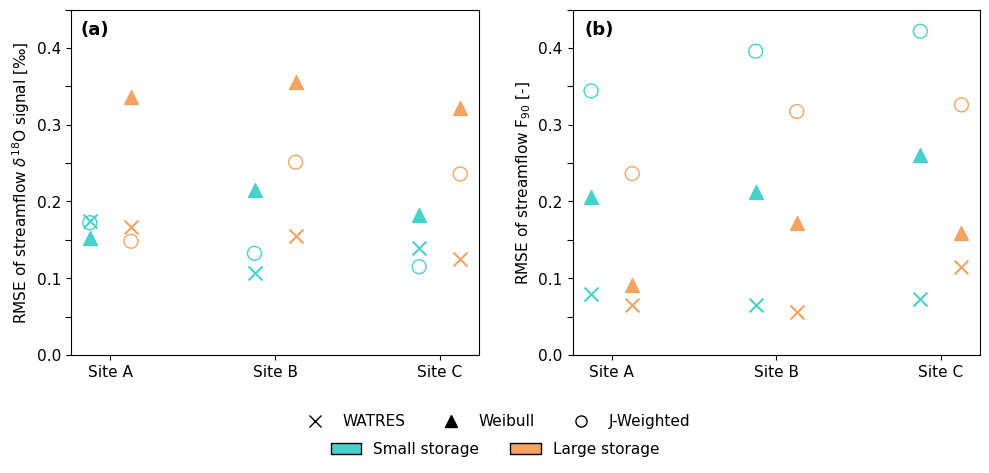

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

font_size = 11
size_marker = 100
colors = ['mediumturquoise', 'sandybrown']
markers = ['x', '^', 'o']

for j in range(len(sites)):
    axs[0].scatter(j/2 + j//2, RMSE_Cout_WATRES[j], marker=markers[0], c=colors[j%2], s=size_marker)
    axs[0].scatter(j/2 + j//2, RMSE_Cout_Weibull[j], marker=markers[1], c=colors[j%2], s=size_marker)
    axs[0].scatter(j/2 + j//2, RMSE_Cout_JWeighted[j], marker=markers[2], edgecolors=colors[j%2], s=size_marker, facecolors='none')

    axs[1].scatter(j/2 + j//2, RMSE_ywf_WATRES[j], marker=markers[0], c=colors[j%2], s=size_marker)
    axs[1].scatter(j/2 + j//2, RMSE_ywf_Weibull[j], marker=markers[1], c=colors[j%2], s=size_marker)
    axs[1].scatter(j/2 + j//2, RMSE_ywf_JWeighted[j], marker=markers[2], edgecolors=colors[j%2], s=size_marker, facecolors='none')

for j in range(2):
    axs[j].set_xticks([0.25, 2.25, 4.25])

for j in range(2):
    axs[j].set_xticklabels(['Site A', 'Site B', 'Site C'])

for ax in axs:
    ax.tick_params(axis='both', labelsize=font_size)

# Legend
model_handles = [
    Line2D([0], [0], marker=markers[0], color='black', linestyle='None', markersize=8, label='WATRES'),
    Line2D([0], [0], marker=markers[1], color='black', linestyle='None', markersize=8, label='Weibull'),
    Line2D([0], [0], marker=markers[2], color='black', linestyle='None', markersize=8, markerfacecolor='none', label='J-Weighted')
]

storage_handles = [
    Patch(facecolor='mediumturquoise', edgecolor='black', label='Small storage'),
    Patch(facecolor='sandybrown', edgecolor='black', label='Large storage')
]

fig.legend(
    handles=model_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.12),  # adjust vertical position
    ncol=3,
    frameon=False,
    fontsize=font_size
)

fig.legend(
    handles=storage_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.19),  # adjust further down
    ncol=2,
    frameon=False,
    fontsize=font_size
)

# Esthetics
axs[0].set_ylabel('RMSE of streamflow $\delta^{18}$O signal [‰]', fontsize=font_size)
axs[1].set_ylabel('RMSE of streamflow F$_{90}$ [-]', fontsize=font_size)

for ax in axs:
    ax.set_ylim(0, 0.45)
    ax.yaxis.set_major_locator(MultipleLocator(0.1))   # Major ticks every 0.1
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))  # Minor ticks every 0.05
    ax.tick_params(axis='y', which='minor', length=4, width=0.8)  # Optional: customize minor tick appearance

fig.text(0.085, 0.9, '(a)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.59, 0.9, '(b)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)  # Increase spacing between subplots

### Second version

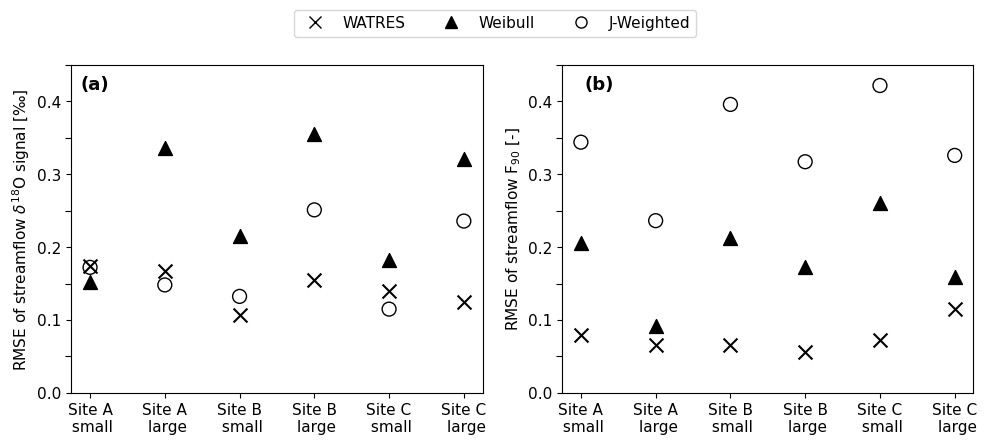

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

font_size = 11
size_marker = 100
colors = ['k']
markers = ['x', '^', 'o']

for j in range(len(sites)):
    axs[0].scatter(j, RMSE_Cout_WATRES[j], marker=markers[0], c=colors[0], s=size_marker)
    axs[0].scatter(j, RMSE_Cout_Weibull[j], marker=markers[1], c=colors[0], s=size_marker)
    axs[0].scatter(j, RMSE_Cout_JWeighted[j], marker=markers[2], edgecolors=colors[0], s=size_marker, facecolors='none')

    axs[1].scatter(j, RMSE_ywf_WATRES[j], marker=markers[0], c=colors[0], s=size_marker)
    axs[1].scatter(j, RMSE_ywf_Weibull[j], marker=markers[1], c=colors[0], s=size_marker)
    axs[1].scatter(j, RMSE_ywf_JWeighted[j], marker=markers[2], edgecolors=colors[0], s=size_marker, facecolors='none')

for j in range(2):
    axs[j].set_xticks(np.arange(len(sites)))

for j in range(2):
    axs[j].set_xticklabels(['Site A\n small', 'Site A\n large', 'Site B\n small', 'Site B\n large', 'Site C\n small', 'Site C\n large'])

for ax in axs:
    ax.tick_params(axis='both', labelsize=font_size)

# Legend
model_handles = [
    Line2D([0], [0], marker=markers[0], color='black', linestyle='None', markersize=8, label='WATRES'),
    Line2D([0], [0], marker=markers[1], color='black', linestyle='None', markersize=8, label='Weibull'),
    Line2D([0], [0], marker=markers[2], color='black', linestyle='None', markersize=8, markerfacecolor='none', label='J-Weighted')
]

fig.legend(
    handles=model_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),  # adjust vertical position
    ncol=3,
    frameon=True,
    fontsize=font_size
)

# Esthetics
axs[0].set_ylabel('RMSE of streamflow $\delta^{18}$O signal [‰]', fontsize=font_size)
axs[1].set_ylabel('RMSE of streamflow F$_{90}$ [-]', fontsize=font_size)

for ax in axs:
    ax.set_ylim(0, 0.45)
    ax.yaxis.set_major_locator(MultipleLocator(0.1))   # Major ticks every 0.1
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))  # Minor ticks every 0.05
    ax.tick_params(axis='y', which='minor', length=4, width=0.8)  # Optional: customize minor tick appearance

fig.text(0.085, 0.9, '(a)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.59, 0.9, '(b)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)

fig.tight_layout()

### Third version

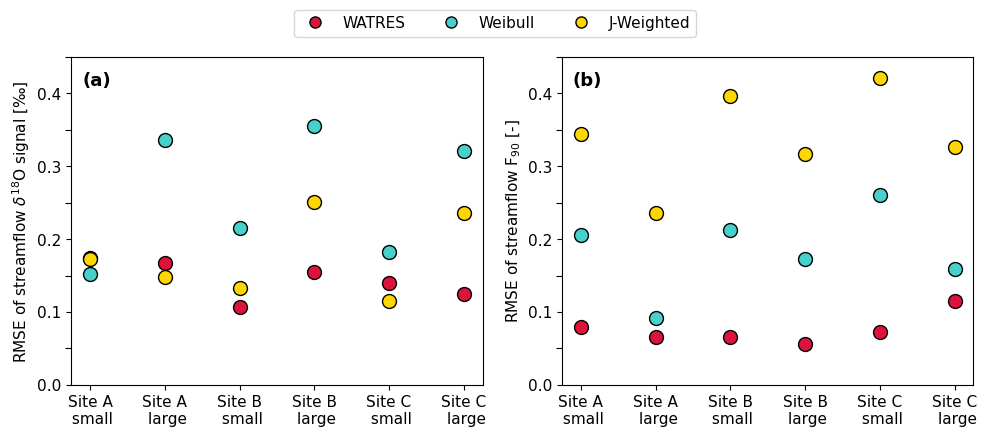

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

font_size = 11
size_marker = 100
colors = ['crimson', 'mediumturquoise', 'gold']
markers = ['o', 'o', 'o']

for j in range(len(sites)):
    axs[0].scatter(j, RMSE_Cout_WATRES[j], marker=markers[0], c=colors[0], s=size_marker, edgecolor='k')
    axs[0].scatter(j, RMSE_Cout_Weibull[j], marker=markers[1], c=colors[1], s=size_marker, edgecolor='k')
    axs[0].scatter(j, RMSE_Cout_JWeighted[j], marker=markers[2], c=colors[2], s=size_marker, edgecolor='k')

    axs[1].scatter(j, RMSE_ywf_WATRES[j], marker=markers[0], c=colors[0], s=size_marker, edgecolor='k')
    axs[1].scatter(j, RMSE_ywf_Weibull[j], marker=markers[1], c=colors[1], s=size_marker, edgecolor='k')
    axs[1].scatter(j, RMSE_ywf_JWeighted[j], marker=markers[2], c=colors[2], s=size_marker, edgecolor='k')

for j in range(2):
    axs[j].set_xticks(np.arange(len(sites)))

for j in range(2):
    axs[j].set_xticklabels(['Site A\n small', 'Site A\n large', 'Site B\n small', 'Site B\n large', 'Site C\n small', 'Site C\n large'])

for ax in axs:
    ax.tick_params(axis='both', labelsize=font_size)

# Legend
model_handles = [
    Line2D([0], [0], marker=markers[0], color=colors[0], linestyle='None', markeredgecolor='k', markersize=8, label='WATRES'),
    Line2D([0], [0], marker=markers[1], color=colors[1], linestyle='None', markeredgecolor='k', markersize=8, label='Weibull'),
    Line2D([0], [0], marker=markers[2], color=colors[2], linestyle='None', markeredgecolor='k', markersize=8, label='J-Weighted')
]

fig.legend(
    handles=model_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),  # adjust vertical position
    ncol=3,
    frameon=True,
    fontsize=font_size
)

# Esthetics
axs[0].set_ylabel('RMSE of streamflow $\delta^{18}$O signal [‰]', fontsize=font_size)
axs[1].set_ylabel('RMSE of streamflow F$_{90}$ [-]', fontsize=font_size)

for ax in axs:
    ax.set_ylim(0, 0.45)
    ax.yaxis.set_major_locator(MultipleLocator(0.1))   # Major ticks every 0.1
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))  # Minor ticks every 0.05
    ax.tick_params(axis='y', which='minor', length=4, width=0.8)  # Optional: customize minor tick appearance

fig.text(0.088, 0.89, '(a)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.578, 0.89, '(b)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)

fig.tight_layout()

# Spline functions

In [31]:
from scipy.interpolate import BSpline

class BasisW():
    def __init__(self, Tmax=3000):
        order = 3
        self.Tmax = Tmax
        
        # xplot remains uniformly spaced
        xplot = np.linspace(0, 1, Tmax)
                
        # Initialize the matrix basis (mat)
        self.init_mat_basisw()
    
    def init_mat_basisw(self):
        m = self.Tmax
        knots_ref = []
        val = 0
        step = 50
        while val<=m:
            knots_ref.append(val)
            val += step
            step *= 1.5
        
        nk = len(knots_ref)
        degree = 2
        n = nk+degree+1
        knots = np.concatenate((min(knots_ref)*np.ones(degree),knots_ref,max(knots_ref)*np.ones(degree)))
        c = np.zeros(n)
        
        # Generate B-spline basis functions
        basis_functions = []
        evaluation_points = np.linspace(min(knots), max(knots), m)
        
        basis_values = []
        for i in range(n):
            c[i] = 1
            basis = BSpline(knots, c, degree)
            basis_values.append(basis(evaluation_points))
            c[i] = 0
        self.basis_values = np.array(basis_values)[1:-3,:]
        self.n_splines = (self.basis_values).shape[0]
        self.basis_values_cum = np.copy(self.basis_values)
        for i in range(self.n_splines):
            self.basis_values_cum[i,:] /= np.sum(self.basis_values_cum[i,:])
            self.basis_values_cum[i,:] = np.flip(np.cumsum(np.flip(self.basis_values_cum[i,:])))


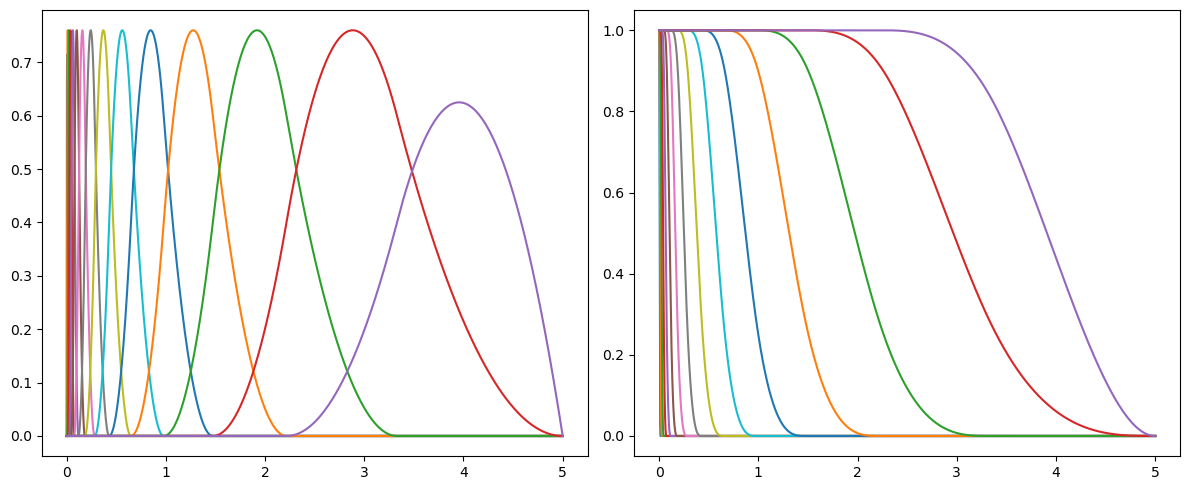

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

spline_familly = BasisW(Tmax=365*24*5)
x_axis_plot = np.arange(0, spline_familly.Tmax) / (365*24)

# B-splines
for i in range(spline_familly.n_splines):
    axs[0].plot(x_axis_plot, spline_familly.basis_values[i,:])

# I-splines
for i in range(spline_familly.n_splines):
    axs[1].plot(x_axis_plot, spline_familly.basis_values_cum[i,:])

    fig.tight_layout()

In [33]:
# Prepare Gamma distributions
from scipy.stats import gamma

ranked_storage_steps = np.arange(401)

shape_param = np.array([1, 2, 3, 4, 6])
scale_param = 40

gamma_pdf_values = np.zeros([len(shape_param), len(ranked_storage_steps)-1])

for j, alpha in enumerate(shape_param):
    gamma_cdf_values = gamma.cdf(ranked_storage_steps, a=alpha, scale=scale_param)
    gamma_pdf_values[j] = np.diff(gamma_cdf_values)

pi_parameters = np.array([0.35, 0.1, 0.15, 0.25, 0.15])
gamma_pdf_mixture = np.sum(pi_parameters[:, np.newaxis] * gamma_pdf_values, axis=0)

# Prepare I-splines
spline_familly = BasisW(Tmax=365*24*5)

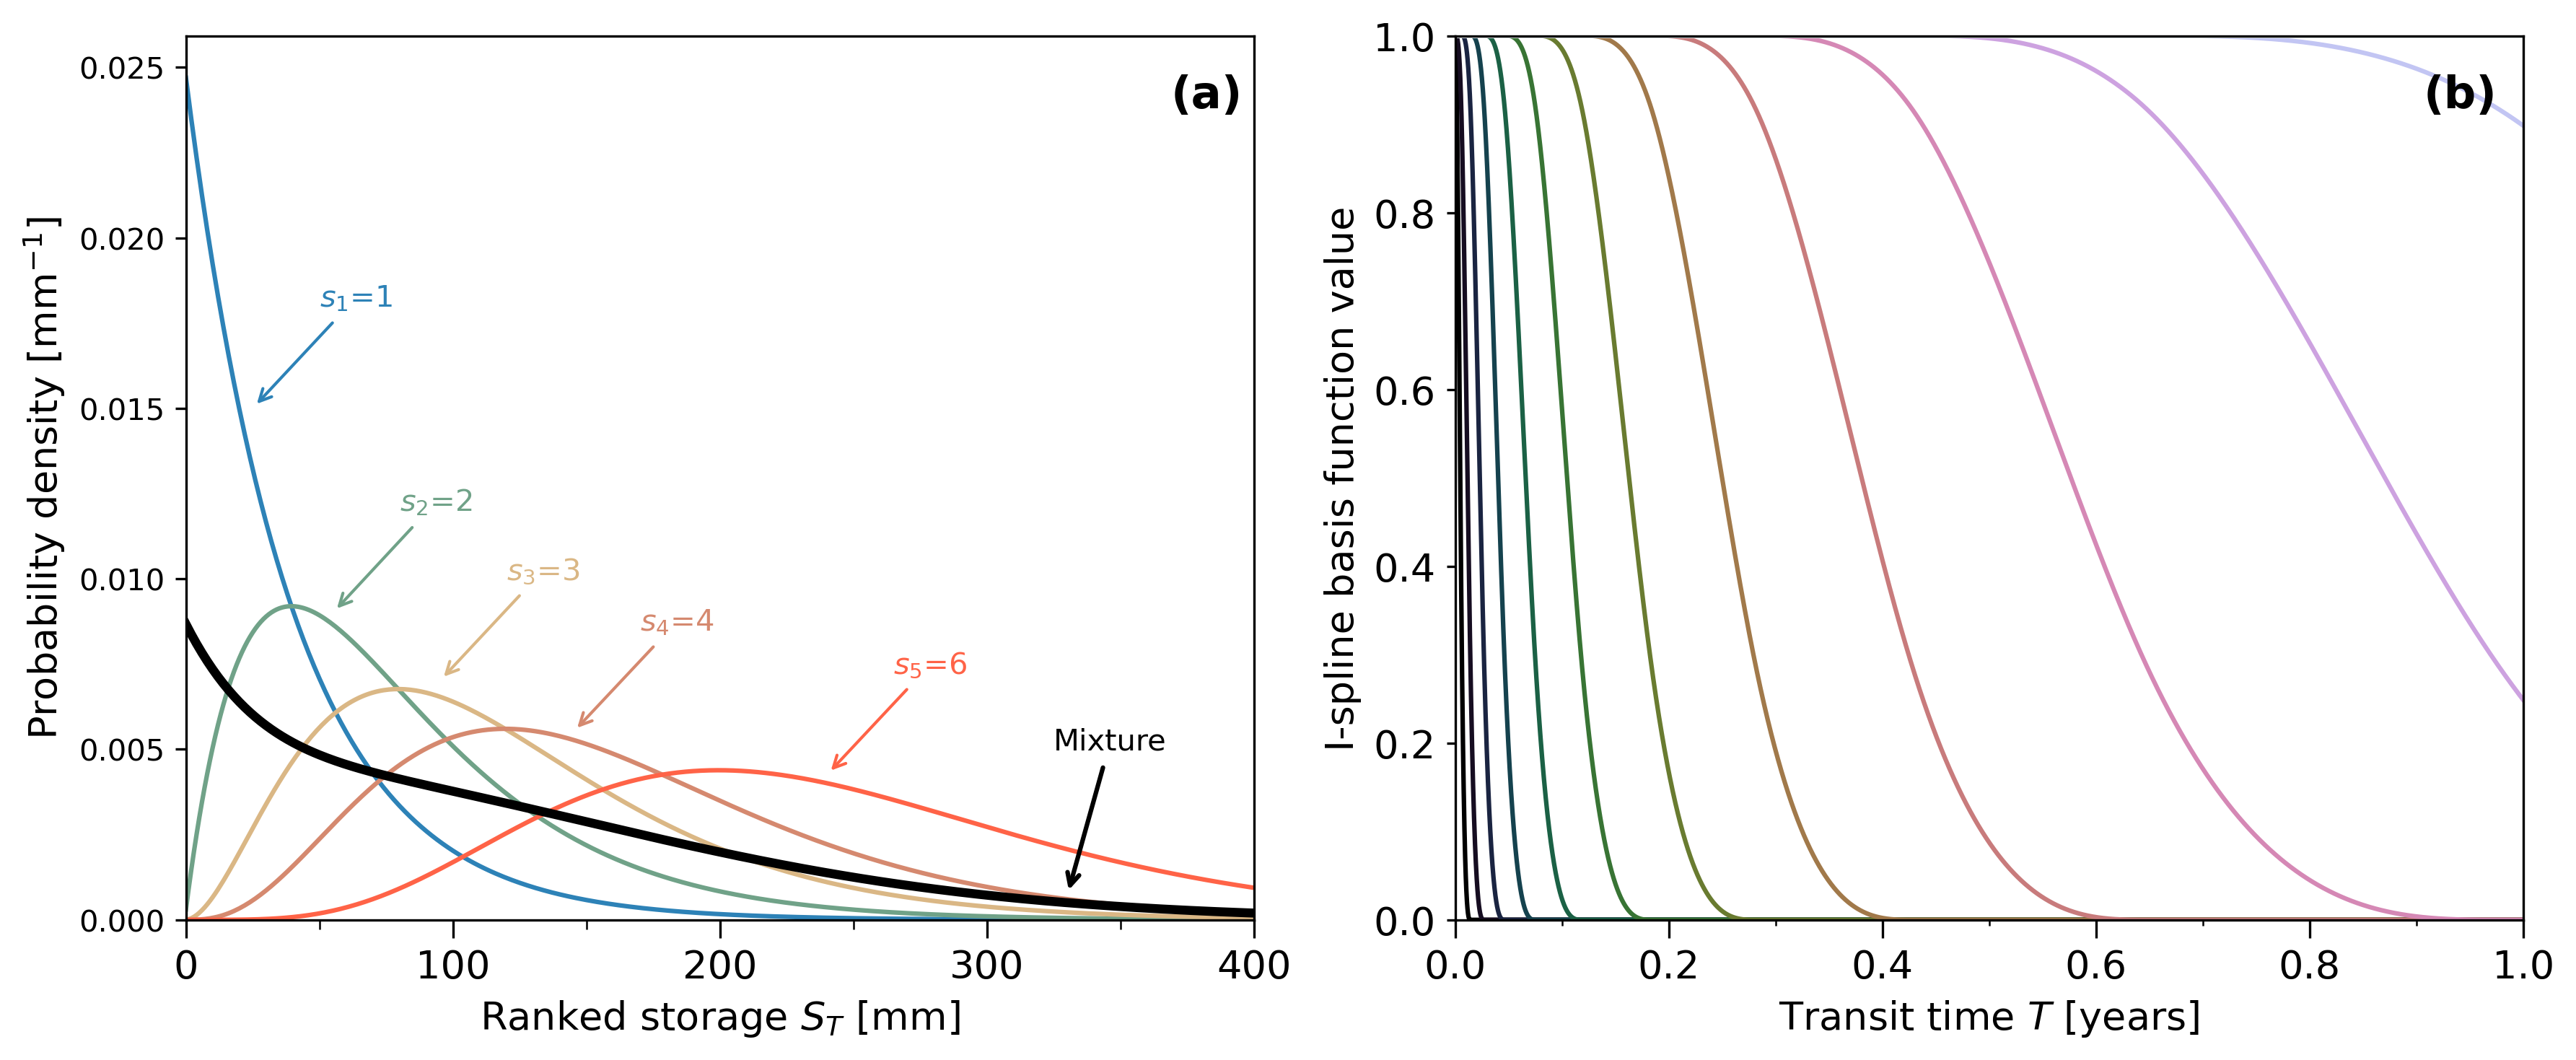

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# First plot
colors_splines = plt.cm.cubehelix(np.linspace(0, 1, spline_familly.n_splines))

spline_x_steps = np.arange(0, spline_familly.Tmax) / (365 * 24)

for j in range(spline_familly.n_splines):
    axs[1].plot(spline_x_steps, spline_familly.basis_values_cum[j, :], c=colors_splines[j])

# Second Plot
colors_gamma = ['#2D82B7', '#70A288', '#DAB785', '#D5896F', 'tomato']

for j in range(len(shape_param)):
    axs[0].plot(ranked_storage_steps[:-1], gamma_pdf_values[j], c=colors_gamma[j])

axs[0].plot(ranked_storage_steps[:-1], gamma_pdf_mixture, c='k', linewidth=3)

# Aesthetics
font_size = 13

axs[1].set_xlim(xmin=0, xmax=1)
axs[1].set_ylim(ymin=0, ymax=1)

axs[1].set_xlabel('Transit time $T$ [years]', fontsize=font_size)
axs[1].set_ylabel('I-spline basis function value', fontsize=font_size)

major_locator = MultipleLocator(.2)
minor_locator = MultipleLocator(.1)

axs[1].xaxis.set_major_locator(major_locator)
axs[1].xaxis.set_minor_locator(minor_locator)
axs[1].tick_params(axis='x', which='major', labelsize=font_size, length=6)
axs[1].tick_params(axis='y', which='major', labelsize=font_size, length=3)

axs[0].set_xlim(xmin=0, xmax=ranked_storage_steps[-1])
axs[0].set_ylim(ymin=0)

axs[0].set_xlabel('Ranked storage $S_T$ [mm]', fontsize=font_size)
axs[0].set_ylabel('Probability density [mm$^{-1}$]', fontsize=font_size)

major_locator = MultipleLocator(100)
minor_locator = MultipleLocator(50)

axs[0].xaxis.set_major_locator(major_locator)
axs[0].xaxis.set_minor_locator(minor_locator)
axs[0].tick_params(axis='x', which='major', labelsize=font_size, length=6)
axs[0].tick_params(axis='x', which='minor', length=3)

# Annotations
axs[0].annotate("$s_1$=1", xytext=(50, .018), xy=(25, .015), color=colors_gamma[0],
                arrowprops=dict(arrowstyle="->", lw=1, color=colors_gamma[0]))
axs[0].annotate("$s_2$=2", xytext=(80, .012), xy=(55, .009), color=colors_gamma[1],
                arrowprops=dict(arrowstyle="->", lw=1, color=colors_gamma[1]))
axs[0].annotate("$s_3$=3", xytext=(120, .010), xy=(95, .007), color=colors_gamma[2],
                arrowprops=dict(arrowstyle="->", lw=1, color=colors_gamma[2]))
axs[0].annotate("$s_4$=4", xytext=(170, .0085), xy=(145, .0055), color=colors_gamma[3],
                arrowprops=dict(arrowstyle="->", lw=1, color=colors_gamma[3]))
axs[0].annotate("$s_5$=6", xytext=(265, .00725), xy=(240, .00425), color=colors_gamma[4],
                arrowprops=dict(arrowstyle="->", lw=1, color=colors_gamma[4]))

axs[0].annotate("Mixture", xytext=(325, .005), xy=(330, .0007),
                arrowprops=dict(arrowstyle="->", lw=1.5, color='k'))

fig.text(0.455, 0.89, '(a)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)
fig.text(0.937, 0.89, '(b)', fontsize=font_size+2, weight='bold', transform=plt.gcf().transFigure)

fig.tight_layout()